## Análise de Dados dos Crimes Contra a Mulher em Belém

### 1. Seleção e tratamento de dados

In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\\Users\\carlo\\Downloads\\crimes_2019_a_2022.csv", low_memory=False)

In [3]:
pd.set_option('display.max_columns', None)
df.head()

nro_bop nro_bop_aditado       nro_tombo      tipo_tombo  \
0  277/2019.255548-2             /.-  NAO INSTAURADO  NAO INSTAURADO   
1  277/2019.257206-7             /.-  NAO INSTAURADO  NAO INSTAURADO   
2  277/2019.161968-6             /.-  NAO INSTAURADO  NAO INSTAURADO   
3  277/2019.162974-0             /.-  NAO INSTAURADO  NAO INSTAURADO   
4  277/2019.166170-0             /.-  NAO INSTAURADO  NAO INSTAURADO   

      unidade_origem                            unidade_responsavel  \
0  DEL.VIRTUAL - 277      SAO FELIX DO XINGU - UNIDADE POLICIAL 212   
1  DEL.VIRTUAL - 277  MARAMBAIA - PATRIMONIO 248 - 1º RISP- 9ª AISP   
2  DEL.VIRTUAL - 277                           TUCURUI - PESSOA 454   
3  DEL.VIRTUAL - 277      GUAMA - PATRIMONIO 326 - 1º RISP- 5ª AISP   
4  DEL.VIRTUAL - 277                 PARAUAPEBAS - 20ª SECCIONAL 71   

  data_registro        hora_registro   data_fato dia_semana  \
0    2019-12-12  1970-01-01 14:43:00  2019-12-11        QUA   
1    2019-12-16  1970-01-01 10:38:00  2019-12-10        TER   
2    2019-08-10  1970-01-01 10:55:00  2019-08-06        TER   
3    2019-08-12  1970-01-01 13:00:00  2019-08-10        SAB   
4    2019-08-16  1970-01-01 13:12:00  2019-07-23        TER   

             hora_fato   fx_4_hor   fx_12_hr data_inst_proc data_concl_proc  \
0  1970-01-01 15:30:00  12 |-- 18  14 |-- 16     1900-09-09      1900-09-09   
1  1970-01-01 15:00:00  12 |-- 18  14 |-- 16     1900-09-09      1900-09-09   
2  1970-01-01 13:30:00  12 |-- 18  12 |-- 14     1900-09-09      1900-09-09   
3  1970-01-01 19:30:00  18 |-- 24  18 |-- 20     1900-09-09      1900-09-09   
4  1970-01-01 22:00:00  18 |-- 24  22 |-- 24     1900-09-09      1900-09-09   

         sit_proc                         classe_motivo mes_registro  \
0  NAO INSTAURADO            CRIMES CONTRA O PATRIMONIO     DEZEMBRO   
1  NAO INSTAURADO            CRIMES CONTRA O PATRIMONIO     DEZEMBRO   
2  NAO INSTAURADO  REGISTROS QUE NAO GERAM PROCEDIMENTO       AGOSTO   
3  NAO INSTAURADO            CRIMES CONTRA O PATRIMONIO       AGOSTO   
4  NAO INSTAURADO            CRIMES CONTRA O PATRIMONIO       AGOSTO   

   mes_fato  ano_registro  ano_fato             registros       consolidado  \
0  DEZEMBRO          2019      2019       ART.155 - FURTO             FURTO   
1  DEZEMBRO          2019      2019       ART.155 - FURTO             FURTO   
2    AGOSTO          2019      2019  DANO CULPOSO (CIVIL)  DANO NO TRANSITO   
3    AGOSTO          2019      2019       ART.155 - FURTO             FURTO   
4     JULHO          2019      2019       ART.155 - FURTO             FURTO   

  fato_real especificacao_crime meio_emp_deac latitude longitude  \
0       NaN                 NaN           NaN      NaN       NaN   
1       NaN                 NaN           NaN      NaN       NaN   
2       NaN                 NaN           NaN      NaN       NaN   
3       NaN                 NaN           NaN      NaN       NaN   
4       NaN                 NaN           NaN      NaN       NaN   

                        causa_presumivel      especializacao_fato  \
0  IMPERICIA / IMPRUDENCIA / NEGLIGENCIA  CRIMES DE FURTO E ROUBO   
1  IMPERICIA / IMPRUDENCIA / NEGLIGENCIA  CRIMES DE FURTO E ROUBO   
2  IMPERICIA / IMPRUDENCIA / NEGLIGENCIA       DELITO DE TRANSITO   
3  IMPERICIA / IMPRUDENCIA / NEGLIGENCIA  CRIMES DE FURTO E ROUBO   
4  IMPERICIA / IMPRUDENCIA / NEGLIGENCIA  CRIMES DE FURTO E ROUBO   

            grupo_ocorrencia                              sub_grupo  \
0  BOPS NA DELEGACIA VIRTUAL  EXT.,FURTO E ROUBO DE DOC.,CH. E CEL.   
1  BOPS NA DELEGACIA VIRTUAL  EXT.,FURTO E ROUBO DE DOC.,CH. E CEL.   
2  BOPS NA DELEGACIA VIRTUAL  EXT.,FURTO E ROUBO DE DOC.,CH. E CEL.   
3  BOPS NA DELEGACIA VIRTUAL  EXT.,FURTO E ROUBO DE DOC.,CH. E CEL.   
4  BOPS NA DELEGACIA VIRTUAL  EXT.,FURTO E ROUBO DE DOC.,CH. E CEL.   

  meio_empregado_sisp            distrito          municipios  \
0     SEM INSTRUMENTO  SAO FELIX DO XINGU  SAO FELIX DO XINGU   
1     SEM 

#### Filtrar apenas as colunas que interessam para a análise:
- Informações gerais:                  
    - 'unidade_origem'
    - 'unidade_responsavel'
    - 'dia_semana'
    - 'fx_4_hor'
    - 'mes_fato'
    - 'ano_fato'
    - 'data_fato'
    - 'consolidado'
    - 'especificacao_crime'
    - 'causa_presumivel'
    - 'meio_empregado_sisp'
    - 'municipios'
    - 'bairros' 
    - 'local_ocorrencia'
    - 'grau_de_relacionamento'
    - 'relato'
- Dados das vitimas:
   - 'vit_idade'
   - 'vit_fx_etaria'
   - 'vit_sexo'
   - 'vit_cor_pele'
   - 'vit_grau_inst'
 - Dados das vitimas:
   - 'aut_sexo'



In [4]:
crimes_df=df[['unidade_origem','unidade_responsavel','dia_semana','fx_4_hor','mes_fato',
                    'ano_fato','data_fato','consolidado','especificacao_crime','causa_presumivel',
                    'meio_empregado_sisp','municipios','bairros','local_ocorrencia','vit_idade',
                    'vit_fx_etaria','vit_sexo','vit_cor_pele','vit_grau_inst',
                    'grau_de_relacionamento', 'relato', 'aut_sexo']]

##### Filtros para crimes que ocorreram somente na capital Belém

In [5]:
crimes_df = crimes_df[crimes_df['municipios'] == 'BELEM']
crimes_df.reset_index(drop=True, inplace=True)
crimes_df.drop(columns=['municipios'], inplace=True)

In [6]:
crimes_df

unidade_origem  \
0                                  DEL.VIRTUAL - 277   
1                                  DEL.VIRTUAL - 277   
2                                  DEL.VIRTUAL - 277   
3       MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP   
4       MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP   
...                                              ...   
564456                                           NaN   
564457                                           NaN   
564458                                           NaN   
564459                                           NaN   
564460                                           NaN   

                                   unidade_responsavel dia_semana   fx_4_hor  \
0        MARAMBAIA - PATRIMONIO 248 - 1º RISP- 9ª AISP        TER  12 |-- 18   
1            GUAMA - PATRIMONIO 326 - 1º RISP- 5ª AISP        SAB  18 |-- 24   
2       SACRAMENTA - PATRIMONIO 240 - 1º RISP- 7ª AISP        SAB  12 |-- 18   
3         MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP        SEX  00 |-- 06   
4         MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP        QUI  18 |-- 24   
...                                                ...        ...        ...   
564456                                             NaN        DOM  06 |-- 12   
564457                                             NaN        DOM  00 |-- 06   
564458                                             NaN        SEX  00 |-- 06   
564459                                             NaN        SEX  00 |-- 06   
564460                                             NaN        TER  06 |-- 12   

         mes_fato  ano_fato            data_fato  \
0        DEZEMBRO      2019           2019-12-10   
1          AGOSTO      2019           2019-08-10   
2          AGOSTO      2019           2019-08-17   
3        NOVEMBRO      2019           2019-11-01   
4        NOVEMBRO      2019           2019-11-28   
...           ...       ...                  ...   
564456  FEVEREIRO      2022  2022-02-13 00:00:00   
564457  FEVEREIRO      2022  2022-02-13 00:00:00   
564458  FEVEREIRO      2022  2022-02-11 00:00:00   
564459  FEVEREIRO      2022  2022-02-11 00:00:00   
564460  FEVEREIRO      2022  2022-02-08 00:00:00   

                               consolidado especificacao_crime  \
0                                    FURTO                 NaN   
1                                    FURTO                 NaN   
2                                    FURTO                 NaN   
3                        TRAFICO DE DROGAS                 NaN   
4                                 DESACATO                 NaN   
...                                    ...                 ...   
564456                              AMEACA                 NaN   
564457  INVASAO DE DISPOSITIVO INFORMATICO                 NaN   
564458  INVASAO DE DISPOSITIVO INFORMATICO                 NaN   
564459     ACIDENTE DE TRANSITO SEM VITIMA                 NaN   
564460                         ESTELIONATO                 NaN   

                             causa_presumivel meio_empregado_sisp  \
0       IMPERICIA / IMPRUDENCIA / NEGLIGENCIA     SEM INSTRUMENTO   
1       IMPERICIA / IMPRUDENCIA / NEGLIGENCIA     SEM INSTRUMENTO   
2       IMPERICIA / IMPRUDENCIA / NEGLIGENCIA     SEM INSTRUMENTO   
3                               ENTORPECENTES        OUTROS MEIOS   
4                                  DEVASSIDAO        OUTROS MEIOS   
...                                       ...                 ...   
564456                                 OUTRAS     SEM INSTRUMENTO   
564457                                 OUTRAS        OUTROS MEIOS   
564458                                 OUTRAS        OUTROS MEIOS   
564459                                 OUTRAS        OUTROS MEIOS   
564460                                 OUTRAS     SEM INSTRUMENTO   

                  bairros                local_ocorrencia  vit_idade  \
0              MANGUEIRAO                     VIA PUBLICA       50.0   
1            

#### Verificar tipos de dados em cada coluna, a quantidade de valores não nulos (não missing), e a quantidade total de memória utilizada pelo DataFrame.

In [7]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564461 entries, 0 to 564460
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   unidade_origem          285383 non-null  object 
 1   unidade_responsavel     285383 non-null  object 
 2   dia_semana              564461 non-null  object 
 3   fx_4_hor                564461 non-null  object 
 4   mes_fato                564461 non-null  object 
 5   ano_fato                564461 non-null  int64  
 6   data_fato               564461 non-null  object 
 7   consolidado             564458 non-null  object 
 8   especificacao_crime     245928 non-null  object 
 9   causa_presumivel        564458 non-null  object 
 10  meio_empregado_sisp     564423 non-null  object 
 11  bairros                 564461 non-null  object 
 12  local_ocorrencia        564452 non-null  object 
 13  vit_idade               564191 non-null  float64
 14  vit_fx_etaria       

In [8]:
crimes_df.isnull().sum()

unidade_origem            279078
unidade_responsavel       279078
dia_semana                     0
fx_4_hor                       0
mes_fato                       0
ano_fato                       0
data_fato                      0
consolidado                    3
especificacao_crime       318533
causa_presumivel               3
meio_empregado_sisp           38
bairros                        0
local_ocorrencia               9
vit_idade                    270
vit_fx_etaria                140
vit_sexo                      29
vit_cor_pele              187847
vit_grau_inst             130738
grau_de_relacionamento    481397
relato                       173
aut_sexo                   73589
dtype: int64

In [9]:
missing_by_column = crimes_df.isnull().sum()
absol_miss = missing_by_column[missing_by_column > 0].sort_values(ascending=False)
perce_miss = absol_miss / crimes_df.shape[0] * 100
dtype_miss = pd.Series({x: crimes_df[x].dtype for x in absol_miss.index})

missing = pd.concat([dtype_miss, absol_miss, perce_miss], axis=1)
missing.columns = ["dtypes", "Absoluto", "Porcentagem"]
missing

dtypes  Absoluto  Porcentagem
grau_de_relacionamento   object    481397    85.284369
especificacao_crime      object    318533    56.431357
unidade_origem           object    279078    49.441503
unidade_responsavel      object    279078    49.441503
vit_cor_pele             object    187847    33.279004
vit_grau_inst            object    130738    23.161565
aut_sexo                 object     73589    13.037039
vit_idade               float64       270     0.047833
relato                   object       173     0.030649
vit_fx_etaria            object       140     0.024802
meio_empregado_sisp      object        38     0.006732
vit_sexo                 object        29     0.005138
local_ocorrencia         object         9     0.001594
consolidado              object         3     0.000531
causa_presumivel         object         3     0.000531

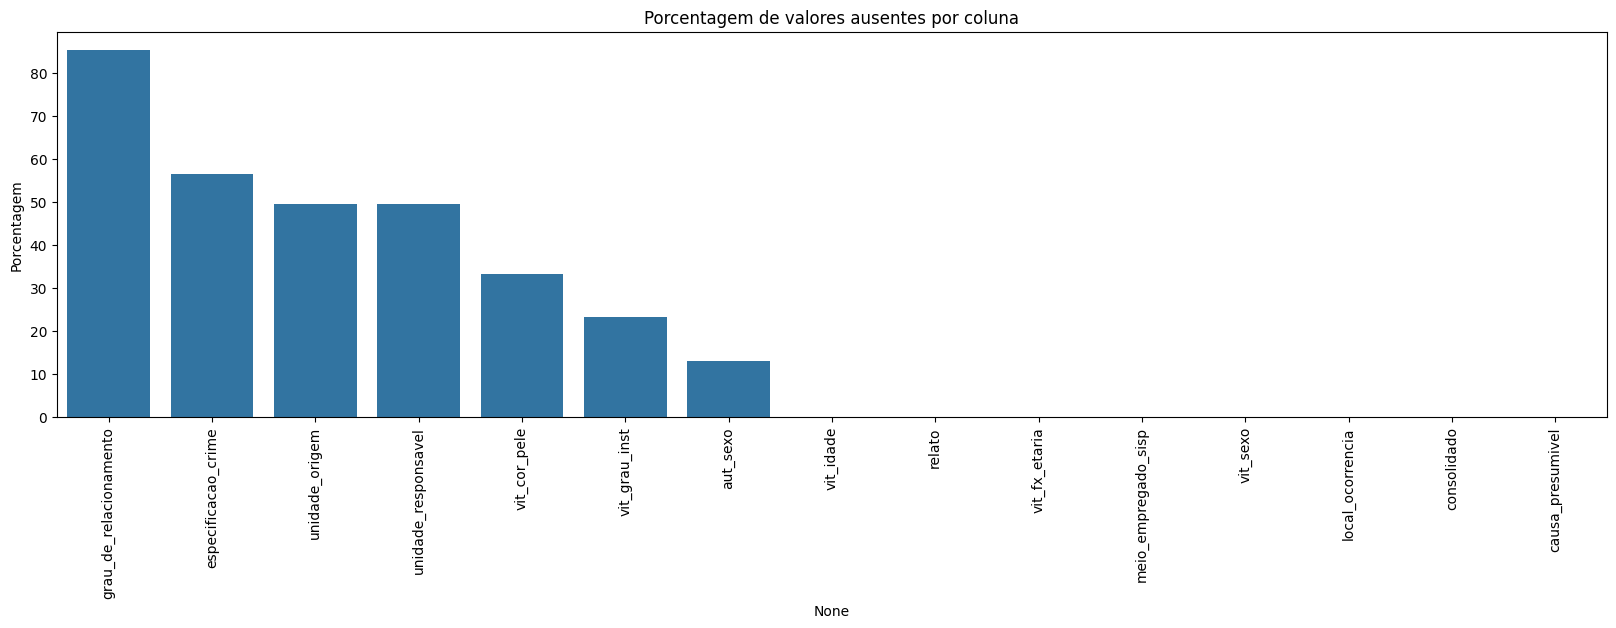

In [10]:
plt.figure(figsize=(20,5))
sns.barplot(x=missing.index, y=missing["Porcentagem"])
plt.xticks(rotation='vertical')
plt.title(f"Porcentagem de valores ausentes por coluna")
plt.show()

- Como as colunas "local_ocorrencia", "consolidado", "causa_presumivel", "vit_sexo", "relato" e "meio_empregado_sisp"  tem poucos valores missing, serao removidas apenas as linhas com valores faltantes. As colunas vit_idade e vit_fx_etaria serão usadas posteriormente para tratamento da coluna vit_fx_etaria, portanto não é interessante a remoção de linhas nesta etapa.

In [11]:
crimes_df.dropna(subset=["local_ocorrencia","meio_empregado_sisp", "consolidado", "causa_presumivel", "vit_sexo", "relato"], inplace=True)

In [12]:
crimes_df.reset_index(drop=True, inplace=True)


In [13]:
missing_by_column_after = crimes_df.isnull().sum()
absol_miss_after = missing_by_column_after[missing_by_column_after > 0].sort_values(ascending=False)
perce_miss_after = absol_miss_after / crimes_df.shape[0] * 100
dtype_miss_after = pd.Series({x: crimes_df[x].dtype for x in absol_miss_after.index})

missing_after = pd.concat([dtype_miss_after, absol_miss_after, perce_miss_after], axis=1)
missing_after.columns = ["dtypes", "Absoluto", "Porcentagem"]
missing_after

dtypes  Absoluto  Porcentagem
grau_de_relacionamento   object    481192    85.286277
especificacao_crime      object    318369    56.427594
unidade_origem           object    278987    49.447544
unidade_responsavel      object    278987    49.447544
vit_cor_pele             object    187800    33.285597
vit_grau_inst            object    130681    23.161848
aut_sexo                 object     73507    13.028351
vit_idade               float64       243     0.043069
vit_fx_etaria            object       115     0.020383

### Tratamento de valores NaN

Dada a considerável presença de dados nulos, excedendo 50% em várias colunas, a abordagem adotada para mitigar essa lacuna consistirá na substituição dos valores NaN por meio do rótulo "Não informado", visando evitar a perda significativa de dados.

In [14]:
colunas_com_NaN = ["grau_de_relacionamento","especificacao_crime",
                   "unidade_responsavel","unidade_origem","vit_cor_pele","vit_grau_inst",
                   "aut_sexo","vit_idade","vit_fx_etaria"]
crimes_df.loc[:, colunas_com_NaN] = crimes_df.loc[:, colunas_com_NaN].fillna("Nao informado")

In [15]:
crimes_df.isnull().sum()

unidade_origem            0
unidade_responsavel       0
dia_semana                0
fx_4_hor                  0
mes_fato                  0
ano_fato                  0
data_fato                 0
consolidado               0
especificacao_crime       0
causa_presumivel          0
meio_empregado_sisp       0
bairros                   0
local_ocorrencia          0
vit_idade                 0
vit_fx_etaria             0
vit_sexo                  0
vit_cor_pele              0
vit_grau_inst             0
grau_de_relacionamento    0
relato                    0
aut_sexo                  0
dtype: int64

### 2. Abordando inconsistências

Durante esta fase, procederemos com a normalização de valores que foram registrados de maneiras diversas, mas que representam o mesmo conceito e tratamento de informacoes nao pertinentes.

1. Verificar os objetos diferentes que compoem cada coluna e quantos se repetem

- vit_sexo

In [16]:
crimes_df.vit_sexo.value_counts()

vit_sexo
M             286852
F             239277
PJ             25483
JL              8820
NI              2443
P               1205
PARDA            105
JA LANCADO        22
BRANCA             1
Name: count, dtype: int64

In [17]:
crimes_df[crimes_df['vit_sexo'] == 'BRANCA']

unidade_origem  \
253996  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...   

                                      unidade_responsavel dia_semana  \
253996  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...        TER   

         fx_4_hor mes_fato  ano_fato   data_fato     consolidado  \
253996  18 |-- 24  JANEIRO      2020  2020-01-14  LESAO CORPORAL   

        especificacao_crime  causa_presumivel meio_empregado_sisp bairros  \
253996  VIOLENCIA DOMESTICA  ODIO OU VINGANCA     SEM INSTRUMENTO   GUAMA   

             local_ocorrencia vit_idade             vit_fx_etaria vit_sexo  \
253996  RESIDENCIA PARTICULAR      37.0  ADULTO IV (35 A 64 ANOS)   BRANCA   

       vit_cor_pele            vit_grau_inst grau_de_relacionamento  \
253996            F  ENSINO MEDIO INCOMPLETO          Nao informado   

                                                   relato aut_sexo  
253996  <p>Foi AGREDIDA FISICAMENTE e AMEAÇADA por seu...        M

Nesta linha da base, é perceptivel o erro na transcrição das informações, visto que a coluna vit_cor_pel e vit_sexo estao com os valores trocados. Como se trata de um caso sobre violencia contra a mulher, será feita a correção.

In [18]:
condicao_sexo_cor = (crimes_df['vit_sexo'] == 'BRANCA') & (crimes_df['vit_cor_pele'] == 'F')
crimes_df.loc[condicao_sexo_cor, ['vit_sexo', 'vit_cor_pele']] = ['F', 'BRANCA']

In [19]:
crimes_df[crimes_df['vit_sexo'] == 'PARDA']

unidade_origem  \
159996         CREMACAO - 4ª SECCIONAL - 1ª RISP- 3ª AISP   
160019       PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP   
170750        COMERCIO - 6ª SECCIONAL - 1ª RISP - 1ª AISP   
170751         CREMACAO - 4ª SECCIONAL - 1ª RISP- 3ª AISP   
170754      SACRAMENTA - 1ª SECCIONAL - 1ª RISP - 7ª AISP   
...                                                   ...   
281738   MARCO - DELEGACIA DE POLICIA - 1ª RISP - 8ª AISP   
284647          SAO BRAS - 2º SECCIONAL -1º RISP- 2ª AISP   
284722  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...   
284732  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...   
285079  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...   

                                      unidade_responsavel dia_semana  \
159996         CREMACAO - 4ª SECCIONAL - 1ª RISP- 3ª AISP        SAB   
160019       PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP        QUI   
170750        COMERCIO - 6ª SECCIONAL - 1ª RISP - 1ª AISP        DOM   
170751         CREMACAO - 4ª SECCIONAL - 1ª RISP- 3ª AISP        DOM   
170754      SACRAMENTA - 1ª SECCIONAL - 1ª RISP - 7ª AISP        QUI   
...                                                   ...        ...   
281738   MARCO - DELEGACIA DE POLICIA - 1ª RISP - 8ª AISP        SEG   
284647  TERRA FIRME - UNIDADE INTEGRADA PROPAZ - 1ª RI...        SEX   
284722  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...        SEG   
284732  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...        DOM   
285079  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...        SEG   

         fx_4_hor mes_fato  ano_fato   data_fato     consolidado  \
159996  06 |-- 12  JANEIRO      2020  2020-01-11  LESAO CORPORAL   
160019  12 |-- 18  JANEIRO      2020  2020-01-16  LESAO CORPORAL   
170750  18 |-- 24  JANEIRO      2020  2020-01-05  LESAO CORPORAL   
170751  12 |-- 18  JANEIRO      2020  2020-01-26  LESAO CORPORAL   
170754  12 |-- 18  JANEIRO      2020  2020-01-16  LESAO CORPORAL   
...           ...      ...       ...         ...             ...   
281738  06 |-- 12  JANEIRO      2020  2020-01-06  LESAO CORPORAL   
284647  18 |-- 24  JANEIRO      2020  2020-01-31  LESAO CORPORAL   
284722  00 |-- 06  JANEIRO      2020  2020-01-20  LESAO CORPORAL   
284732  00 |-- 06  JANEIRO      2020  2020-01-12  LESAO CORPORAL   
285079  00 |-- 06  JANEIRO      2020  2020-01-27  LESAO CORPORAL   

        especificacao_crime         causa_presumivel meio_empregado_sisp  \
159996  VIOLENCIA DOMESTICA                    CIUME        OUTROS MEIOS   
160019  VIOLENCIA DOMESTICA         ODIO OU VINGANCA        OUTROS MEIOS   
170750  VIOLENCIA DOMESTICA                   OUTRAS        OUTROS MEIOS   
170751  VIOLENCIA DOMESTICA  ALCOOLISMO / EMBRIAGUEZ        OUTROS MEIOS   
170754  VIOLENCIA DOMESTICA                   OUTRAS        OUTROS MEIOS   
...                     ...                      ...                 ...   
281738  VIOLENCIA DOMESTICA         ODIO OU VINGANCA        OUTROS MEIOS   
284647  VIOLENCIA DOMESTICA                   OUTRAS        OUTROS MEIOS   
284722  VIOLENCIA DOMESTICA         ODIO OU VINGANCA     SEM INSTRUMENTO   
284732  VIOLENCIA DOMESTICA                   OUTRAS     SEM INSTRUMENTO   
285079  VIOLENCIA DOMESTICA                   OUTRAS              ONIBUS   

                  bairros        local_ocorrencia vit_idade  \
159996           CREMACAO             VIA PUBLICA      23.0   
160019           PEDREIRA                  PREDIO      22.0   
170750       CIDADE VELHA  CAFE, BAR, RESTAURANTE      31.0   
170751           CREMACAO             VIA PUBLICA      63.0   
170754  TELEGRAFO SEM FIO   RESIDENCIA PARTICULAR      36.0   
...                   ...                     ...       ...   
281738              MARCO             VIA PUBLICA      52.0   
284647        TERRA FIRME   RESIDENCIA PARTICULAR      17.0   
284722  TELEGRAFO SEM FIO   RESIDENCIA PARTICULAR      20.0   
284732         SACRAMENTA  CAFE, BAR, RESTAURANTE      23.0   
285079           PRATI

Para tratar melhor as linhas com 'PARDA' na coluna 'vit_sexo', serão excluidos as linhas em que a vitima não é do sexo feminino e os valores 'JL', 'JA LANCADO', 'P', 'NI' E 'PJ'

In [20]:
crimes_df.drop(crimes_df.loc[crimes_df['vit_sexo']=='PJ'].index, inplace=True)

In [21]:
crimes_df.drop(crimes_df.loc[crimes_df['vit_sexo']=='M'].index, inplace=True)

In [22]:
crimes_df.drop(crimes_df.loc[crimes_df['vit_sexo']=='P'].index, inplace=True)

In [23]:
crimes_df.drop(crimes_df.loc[crimes_df['vit_sexo']=='JL'].index, inplace=True)

In [24]:
crimes_df.drop(crimes_df.loc[crimes_df['vit_sexo']=='JA LANCADO'].index, inplace=True)

In [25]:
crimes_df.drop(crimes_df.loc[crimes_df['vit_sexo']=='NI'].index, inplace=True)

In [26]:
crimes_df.vit_sexo.value_counts()

vit_sexo
F        239278
PARDA       105
Name: count, dtype: int64

In [27]:
crimes_df[(crimes_df['vit_sexo'] == 'PARDA') & (crimes_df['vit_cor_pele'] == 'F')]

unidade_origem  \
159996         CREMACAO - 4ª SECCIONAL - 1ª RISP- 3ª AISP   
160019       PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP   
170756  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...   
170770  ICOARACI - 8ª SECCIONAL - 1ª RISP - 11ª, 12ª E...   
171015  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...   
...                                                   ...   
278699  TENONE UNIDADE INTEGRADA PROPAZ - 1ª RISP - 13...   
284647          SAO BRAS - 2º SECCIONAL -1º RISP- 2ª AISP   
284722  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...   
284732  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...   
285079  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...   

                                      unidade_responsavel dia_semana  \
159996         CREMACAO - 4ª SECCIONAL - 1ª RISP- 3ª AISP        SAB   
160019       PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP        QUI   
170756  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...        DOM   
170770  ICOARACI - 8ª SECCIONAL - 1ª RISP - 11ª, 12ª E...        DOM   
171015  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...        QUA   
...                                                   ...        ...   
278699  TENONE UNIDADE INTEGRADA PROPAZ - 1ª RISP - 13...        TER   
284647  TERRA FIRME - UNIDADE INTEGRADA PROPAZ - 1ª RI...        SEX   
284722  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...        SEG   
284732  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...        DOM   
285079  DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...        SEG   

         fx_4_hor mes_fato  ano_fato   data_fato     consolidado  \
159996  06 |-- 12  JANEIRO      2020  2020-01-11  LESAO CORPORAL   
160019  12 |-- 18  JANEIRO      2020  2020-01-16  LESAO CORPORAL   
170756  18 |-- 24  JANEIRO      2020  2020-01-19  LESAO CORPORAL   
170770  00 |-- 06  JANEIRO      2020  2020-01-19  LESAO CORPORAL   
171015  00 |-- 06  JANEIRO      2020  2020-01-01  LESAO CORPORAL   
...           ...      ...       ...         ...             ...   
278699  06 |-- 12  JANEIRO      2020  2020-01-21  LESAO CORPORAL   
284647  18 |-- 24  JANEIRO      2020  2020-01-31  LESAO CORPORAL   
284722  00 |-- 06  JANEIRO      2020  2020-01-20  LESAO CORPORAL   
284732  00 |-- 06  JANEIRO      2020  2020-01-12  LESAO CORPORAL   
285079  00 |-- 06  JANEIRO      2020  2020-01-27  LESAO CORPORAL   

        especificacao_crime  causa_presumivel meio_empregado_sisp  \
159996  VIOLENCIA DOMESTICA             CIUME        OUTROS MEIOS   
160019  VIOLENCIA DOMESTICA  ODIO OU VINGANCA        OUTROS MEIOS   
170756  VIOLENCIA DOMESTICA             CIUME        OUTROS MEIOS   
170770  VIOLENCIA DOMESTICA            OUTRAS        OUTROS MEIOS   
171015  VIOLENCIA DOMESTICA  ODIO OU VINGANCA        OUTROS MEIOS   
...                     ...               ...                 ...   
278699  VIOLENCIA DOMESTICA            OUTRAS        OUTROS MEIOS   
284647  VIOLENCIA DOMESTICA            OUTRAS        OUTROS MEIOS   
284722  VIOLENCIA DOMESTICA  ODIO OU VINGANCA     SEM INSTRUMENTO   
284732  VIOLENCIA DOMESTICA            OUTRAS     SEM INSTRUMENTO   
285079  VIOLENCIA DOMESTICA            OUTRAS              ONIBUS   

                  bairros        local_ocorrencia vit_idade  \
159996           CREMACAO             VIA PUBLICA      23.0   
160019           PEDREIRA                  PREDIO      22.0   
170756        TERRA FIRME   RESIDENCIA PARTICULAR      24.0   
170770           PARACURI   RESIDENCIA PARTICULAR      45.0   
171015         MANGUEIRAO   RESIDENCIA PARTICULAR      48.0   
...                   ...                     ...       ...   
278699             TENONE             VIA PUBLICA      36.0   
284647        TERRA FIRME   RESIDENCIA PARTICULAR      17.0   
284722  TELEGRAFO SEM FIO   RESIDENCIA PARTICULAR      20.0   
284732         SACRAMENTA  CAFE, BAR, RESTAURANTE      23.0   
285079           PRATINHA   RESIDENCIA PARTICULAR      27.0   

                     vit_fx_etaria vit_sex

In [28]:
condicao_sexo_cor_1 = (crimes_df['vit_sexo'] == 'PARDA') & (crimes_df['vit_cor_pele'] == 'F')
crimes_df.loc[condicao_sexo_cor_1, ['vit_sexo', 'vit_cor_pele']] = ['F', 'PARDA']

O restante são valores que estão preenchidos com 'M' na coluna 'vit_cor_pele', serão excluidos a seguir no tratamento da coluna em questao

In [29]:
crimes_df.vit_sexo.value_counts()

vit_sexo
F        239372
PARDA        11
Name: count, dtype: int64

- vit_cor_pele

In [30]:
crimes_df.vit_cor_pele.value_counts()

vit_cor_pele
PREJUDICADO        120310
Nao informado       81234
NAO INFORMADO       34436
PARDA                3129
BRANCA                156
PRETA                  88
M                      11
JA LANCADO              7
INDIGENA                7
PJ, EP E OUTROS         4
AMARELA                 1
Name: count, dtype: int64

In [31]:
crimes_df.loc[crimes_df.vit_cor_pele == "Nao informado",'vit_cor_pele']= 'PREJUDICADO'

In [32]:
crimes_df.loc[crimes_df.vit_cor_pele == "NAO INFORMADO",'vit_cor_pele']= 'PREJUDICADO'

In [33]:
crimes_df.drop(crimes_df.loc[crimes_df['vit_cor_pele']=='M'].index, inplace=True)

In [34]:
crimes_df.drop(crimes_df.loc[crimes_df['vit_cor_pele']=='JA LANCADO'].index, inplace=True)

In [35]:
crimes_df.drop(crimes_df.loc[crimes_df['vit_cor_pele']=='PJ, EP E OUTROS'].index, inplace=True)

In [36]:
crimes_df.vit_cor_pele.value_counts()

vit_cor_pele
PREJUDICADO    235980
PARDA            3129
BRANCA            156
PRETA              88
INDIGENA            7
AMARELA             1
Name: count, dtype: int64

- local_ocorrencia

In [37]:
local_ocorrencia_unico = crimes_df["local_ocorrencia"].unique().tolist()
print("Numero unico de local_ocorrencia: ", len(local_ocorrencia_unico))
local_ocorrencia_unico

Numero unico de local_ocorrencia:  194


['VIA PUBLICA',
 'TRANSPORTE',
 'OUTROS',
 'RESIDENCIA PARTICULAR',
 'MAR, RIO, LAGOA',
 'CAFE,BAR,ETC',
 'HOSPITAL',
 'OUTROS ESTADOS',
 'ESTABELECIMENTO BANCARIO',
 'CONDOMINIO COMERCIAL',
 'ESTABELECIMENTO DE ENSINO',
 'LOGRADORO PUBLICO',
 'INTERNET',
 'CASA COMERCIAL',
 'CAFE, BAR, RESTAURANTE',
 'PREDIO',
 'CONDOMINIO RESIDENCIAL',
 'EDIFICIO PUBLICO',
 'VIA PUBLICA ',
 'CASA DE TOLERANCIA',
 'CRECHE',
 'LOJAS DE CONVENIENCIA',
 'TRANSPORTE ',
 'CASA COMERCIAL ',
 'CAIXA ELETRONICO',
 'LOJA ',
 'LOJA',
 'VIA FERREA',
 'FARMACIA',
 'REDIDENCIA PARTICULAR ',
 'HOTEL, PENSAO, ETC',
 'HABITACAO COLETIVA',
 'SUPERMERCADO',
 'OUTROS PAISES',
 'PENITENCIARIA, REFORMATORIO',
 'PREDIO EM OBRAS',
 'MERCADINHO',
 'LOJA DE CONVENIENCIA ',
 'IGREJA',
 'SALAO DE BELEZA',
 'POSTO DE GASOLINA',
 'CLINICA ',
 'TERRENO BALDIO',
 'COOPERATIVA',
 'CAMPUS UNIVERSITARIO',
 'CRAS',
 'ORGAO PUBLICO',
 'PANIFICADORA',
 'BAR',
 'FARMACIA ',
 'CLUBE',
 'SALAO DE BELEZA ',
 'EMPRESA',
 'CONSULTORIO',
 'TRAN

In [38]:
crimes_df.loc[crimes_df.local_ocorrencia == "VIA PUBLICA ",'local_ocorrencia'] = 'VIA PUBLICA'

In [39]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPORTE ",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [40]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPORTE URBANO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [41]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPORTE PUBLICO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [42]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPORTE POR APLICATIVO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [43]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPORTE COLETIVO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [44]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPOSTE PUBLICO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [45]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANPORTE COLETIVO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [46]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPORTE (COLETIVO, PRIVADO OU ESCOLAR)",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [47]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPORTE COLETVIO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [48]:
crimes_df.loc[crimes_df.local_ocorrencia == "COLETIVO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [49]:
crimes_df.loc[crimes_df.local_ocorrencia == "EM COLETIVO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [50]:
crimes_df.loc[crimes_df.local_ocorrencia == "MAR, RIO, LAGOA",'local_ocorrencia'] = 'MAR, RIO, LAGOA'


In [51]:
crimes_df.loc[crimes_df.local_ocorrencia == "MAR,RIO,LAGOA",'local_ocorrencia'] = 'MAR, RIO, LAGOA'

In [52]:
crimes_df.loc[crimes_df.local_ocorrencia == "MAR, RIO E LAGOA",'local_ocorrencia']= 'MAR, RIO, LAGOA'


In [53]:
crimes_df.loc[crimes_df.local_ocorrencia == "PORTO",'local_ocorrencia']=  'PORTOS / MARINAS / ATRACADOUROS',

In [54]:
crimes_df.loc[crimes_df.local_ocorrencia == "MAR / OCEANO",'local_ocorrencia']='MAR, RIO, LAGOA'

In [55]:
crimes_df.loc[crimes_df.local_ocorrencia == "REPRESAS",'local_ocorrencia']='MAR, RIO, LAGOA'

In [56]:
crimes_df.loc[crimes_df.local_ocorrencia == "RIO",'local_ocorrencia']='MAR, RIO, LAGOA'

In [57]:
crimes_df.loc[crimes_df.local_ocorrencia == "IGARAPE",'local_ocorrencia']='MAR, RIO, LAGOA'

In [58]:
crimes_df.loc[crimes_df.local_ocorrencia == "RESTAURANTE ",'local_ocorrencia'] =  'CAFE, BAR, RESTAURANTE, ETC'

In [59]:
crimes_df.loc[crimes_df.local_ocorrencia == "HOSPITAL ",'local_ocorrencia'] = 'HOSPITAL'

In [60]:
crimes_df.loc[crimes_df.local_ocorrencia == "ESTABELECIMENTO DE COMERCIAL",'local_ocorrencia'] = 'ESTABELECIMENTO COMERCIAL'

In [61]:
crimes_df.loc[crimes_df.local_ocorrencia == "ESTABELECIMENTO PRISIONAL",'local_ocorrencia'] = 'PENITENCIARIA, REFORMATORIO'

In [62]:
crimes_df.loc[crimes_df.local_ocorrencia == "AMBIENTE VIRTUAL (INTERNET)",'local_ocorrencia'] = 'INTERNET'

In [63]:
crimes_df.loc[crimes_df.local_ocorrencia == "AMBIENTE VIRTUAL (NTERNET)",'local_ocorrencia'] = 'INTERNET'

In [64]:
crimes_df.loc[crimes_df.local_ocorrencia == "AMBIENTE VIRTUAL (PIX)",'local_ocorrencia'] = 'INTERNET'

In [65]:
crimes_df.loc[crimes_df.local_ocorrencia == "AMBIENTE VIRTUAL",'local_ocorrencia'] = 'INTERNET'

In [66]:
crimes_df.loc[crimes_df.local_ocorrencia == "INTERNET (REDES SOCIAIS, APLICATIVOS DE MENSAGENS, E-MAIL, SITES, BLOGS, PORTAIS E OUTROS)",'local_ocorrencia'] = 'INTERNET'

In [67]:
crimes_df.loc[crimes_df.local_ocorrencia == "CASA COMERCIAL ",'local_ocorrencia'] = 'CASA COMERCIAL'

In [68]:
crimes_df.loc[crimes_df.local_ocorrencia == "PREDIO EM OBRAS",'local_ocorrencia'] = 'PREDIO'


In [69]:
crimes_df.loc[crimes_df.local_ocorrencia == "PREDIO DO JORNAL",'local_ocorrencia'] = 'PREDIO'

In [70]:
crimes_df.loc[crimes_df.local_ocorrencia == "PREDIO/PALACIO DO RADIO",'local_ocorrencia'] = 'PREDIO'

In [71]:
crimes_df.loc[crimes_df.local_ocorrencia == "LOJA ",'local_ocorrencia'] = 'LOJA'

In [72]:
crimes_df.loc[crimes_df.local_ocorrencia == "AMERICANAS",'local_ocorrencia'] = 'LOJA'

In [73]:
crimes_df.loc[crimes_df.local_ocorrencia == "LOJA DE CONVENIENCIA ",'local_ocorrencia'] =  'LOJA DE CONVENIENCIA'

In [74]:
crimes_df.loc[crimes_df.local_ocorrencia == "LOJAS DE CONVENIENCIA",'local_ocorrencia'] =  'LOJA DE CONVENIENCIA'

In [75]:
crimes_df.loc[crimes_df.local_ocorrencia == "VIA FERREA",'local_ocorrencia'] =   'ESTACAO FERROVIARIA'

In [76]:
crimes_df.loc[crimes_df.local_ocorrencia == "FARMACIA ",'local_ocorrencia'] =   'FARMACIA'

In [77]:
crimes_df.loc[crimes_df.local_ocorrencia == "RESIDENCIA",'local_ocorrencia'] = 'RESIDENCIA PARTICULAR'

In [78]:
crimes_df.loc[crimes_df.local_ocorrencia == "EM RESIDENCIA",'local_ocorrencia'] = 'RESIDENCIA PARTICULAR'

In [79]:
crimes_df.loc[crimes_df.local_ocorrencia == "PROPRIEDADE RESIDENCIAL URBANA",'local_ocorrencia'] = 'RESIDENCIA PARTICULAR'

In [80]:
crimes_df.loc[crimes_df.local_ocorrencia == "SUPERMERCADO ",'local_ocorrencia'] = 'SUPERMERCADO'

In [81]:
crimes_df.loc[crimes_df.local_ocorrencia == "SUPERMERCADO LIDER",'local_ocorrencia'] = 'SUPERMERCADO'

In [82]:
crimes_df.loc[crimes_df.local_ocorrencia == "SALAO DE BELEZA ",'local_ocorrencia'] = 'SALAO DE BELEZA'

In [83]:
crimes_df.loc[crimes_df.local_ocorrencia == "POSTO DE GASOLINA ",'local_ocorrencia'] = 'POSTO DE GASOLINA'

In [84]:
crimes_df.loc[crimes_df.local_ocorrencia == "POSTO DE SAUDE ",'local_ocorrencia'] = 'POSTO DE SAUDE'

In [85]:
crimes_df.loc[crimes_df.local_ocorrencia == "CLINICA ",'local_ocorrencia'] = 'CLINICA'

In [86]:
crimes_df.loc[crimes_df.local_ocorrencia == "PANIFICADORA ",'local_ocorrencia'] = 'PANIFICADORA'

In [87]:
crimes_df.loc[crimes_df.local_ocorrencia == "CLUBE\\r\\n",'local_ocorrencia'] = 'CLUBE'

In [88]:
crimes_df.loc[crimes_df.local_ocorrencia == "CLUBES E AGREMIACOES",'local_ocorrencia'] = 'CLUBE'

In [89]:
crimes_df.loc[crimes_df.local_ocorrencia == "INDUSTRIA",'local_ocorrencia'] = 'ESTABELECIMENTO INDUSTRIAL'

In [90]:
crimes_df.loc[crimes_df.local_ocorrencia == "ESTACIONAMENTO ",'local_ocorrencia'] = 'ESTACIONAMENTO'

In [91]:
crimes_df.loc[crimes_df.local_ocorrencia == "ESTACIONAMENTO BANCARIO",'local_ocorrencia'] = 'ESTACIONAMENTO'

In [92]:
crimes_df.loc[crimes_df.local_ocorrencia == "PROSTIBULO",'local_ocorrencia'] = 'LOCAL DE PROSTITUICAO'

In [93]:
crimes_df.loc[crimes_df.local_ocorrencia == "CASA DE TOLERANCIA",'local_ocorrencia'] = 'LOCAL DE PROSTITUICAO'

In [94]:
crimes_df.loc[crimes_df.local_ocorrencia == "ESTADIO DE FUTEBOL",'local_ocorrencia'] = 'ESTADIO ESPORTIVO'

In [95]:
crimes_df.loc[crimes_df.local_ocorrencia == "LANCHONETE ",'local_ocorrencia'] =  'LANCHONETE'

In [96]:
crimes_df.loc[crimes_df.local_ocorrencia == "SHOPPING ",'local_ocorrencia'] =  'SHOPPING'

In [97]:
crimes_df.loc[crimes_df.local_ocorrencia == "SHOPPING BOULEVARD",'local_ocorrencia'] =  'SHOPPING'

In [98]:
crimes_df.loc[crimes_df.local_ocorrencia == "DEPOSITO ",'local_ocorrencia'] =  'DEPOSITO'

In [99]:
crimes_df.loc[crimes_df.local_ocorrencia == "DEPOSITO DE GAS ",'local_ocorrencia'] =  'DEPOSITO'

In [100]:
crimes_df.loc[crimes_df.local_ocorrencia == "LOCADORA DE AUTOMOVEIS",'local_ocorrencia'] =  'LOCADORA'

In [101]:
crimes_df.loc[crimes_df.local_ocorrencia == "SINDICATO E ASSOCIACAO DE CLASSE",'local_ocorrencia'] =  'SINDICATO'

In [102]:
crimes_df.loc[crimes_df.local_ocorrencia == "EM VEICULO",'local_ocorrencia'] = 'VEICULO'

In [103]:
crimes_df.loc[crimes_df.local_ocorrencia == "CARRO DE TRANSPORTE DE VALORES",'local_ocorrencia'] = 'CARRO FORTE'

In [104]:
crimes_df.loc[crimes_df.local_ocorrencia == "ABRIGO",'local_ocorrencia'] = 'CASA DE ABRIGO E ASSISTENCIA'

In [105]:
crimes_df.loc[crimes_df.local_ocorrencia == "ONIBUS",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'

In [106]:
crimes_df.loc[crimes_df.local_ocorrencia == "CENTRO LOTERICO",'local_ocorrencia'] = 'LOTERICA'

In [107]:
crimes_df.loc[crimes_df.local_ocorrencia == "ESTABELECIMENTO LOTERICO",'local_ocorrencia'] = 'LOTERICA'

In [108]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSORTE",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'

In [109]:
crimes_df.loc[crimes_df.local_ocorrencia == "HOTEL",'local_ocorrencia'] = 'HOTEL, PENSAO, ETC'

In [110]:
crimes_df.loc[crimes_df.local_ocorrencia == "AEROPORTOS / PISTA DE POUSO",'local_ocorrencia'] = 'AEROPORTO'

In [111]:
crimes_df.loc[crimes_df.local_ocorrencia == "SEM INFORMACAO",'local_ocorrencia'] =  'NAO INFORMADO'

In [112]:
crimes_df.loc[crimes_df.local_ocorrencia == "OUTRO",'local_ocorrencia'] = 'OUTROS LOCAIS'


In [113]:
novo_local_ocorrencia_unico = crimes_df["local_ocorrencia"].unique()
print("Numero unico de local_ocorrencia:", len(novo_local_ocorrencia_unico))
novo_local_ocorrencia_unico


Numero unico de local_ocorrencia: 125


array(['VIA PUBLICA', 'TRANSPORTE', 'OUTROS', 'RESIDENCIA PARTICULAR',
       'MAR, RIO, LAGOA', 'CAFE,BAR,ETC', 'HOSPITAL', 'OUTROS ESTADOS',
       'ESTABELECIMENTO BANCARIO', 'CONDOMINIO COMERCIAL',
       'ESTABELECIMENTO DE ENSINO', 'LOGRADORO PUBLICO', 'INTERNET',
       'CASA COMERCIAL', 'CAFE, BAR, RESTAURANTE', 'PREDIO',
       'CONDOMINIO RESIDENCIAL', 'EDIFICIO PUBLICO',
       'LOCAL DE PROSTITUICAO', 'CRECHE', 'LOJA DE CONVENIENCIA',
       'TRANSPORTE(PUBLICO, URBANO, ETC)', 'CAIXA ELETRONICO', 'LOJA',
       'ESTACAO FERROVIARIA', 'FARMACIA', 'REDIDENCIA PARTICULAR ',
       'HOTEL, PENSAO, ETC', 'HABITACAO COLETIVA', 'SUPERMERCADO',
       'OUTROS PAISES', 'PENITENCIARIA, REFORMATORIO', 'MERCADINHO',
       'IGREJA', 'SALAO DE BELEZA', 'POSTO DE GASOLINA', 'CLINICA',
       'TERRENO BALDIO', 'COOPERATIVA', 'CAMPUS UNIVERSITARIO', 'CRAS',
       'ORGAO PUBLICO', 'PANIFICADORA', 'BAR', 'CLUBE', 'EMPRESA',
       'CONSULTORIO', 'ESTABELECIMENTO INDUSTRIAL', 'LOTERICA',
   

- Grau de relacionamento

In [114]:
grau_de_relac_unico = crimes_df["grau_de_relacionamento"].unique()
print("numero de itens unicos em grau_de_relacionamento:", len(grau_de_relac_unico))
grau_de_relac_unico

numero de itens unicos em grau_de_relacionamento: 62


array(['Nao informado', 'NAO INFORMADO', 'COMPANHEIRO(A)',
       'EX-COMPANHEIRO(A)', 'VIZINHO(A)', 'PADRASTO', 'PAI', 'IRMAO(A)',
       'AVO', 'AMIGO(A)', 'SOGRO(A)', 'TIO(A)', 'PRIMO(A)', 'SOBRINHO(A)',
       'CONHECIDO(A)', 'NAMORADO(A)', 'EX-NAMORADO(A)', 'FILHO(A)', 'MAE',
       'GENRO', 'CUNHADO(A)', 'EX-CUNHADO(A)', 'MADRASTA', 'NETO(A)',
       'EX-PADRASTO', 'PADRINHO', 'EX-NORA', 'EX-PADASTRO', 'NORA',
       'PARENTESCO POR AFINIDADE', 'PREJUDICADO', 'PJ, EP E OUTROS',
       'ENTEADO(A)', 'EX-MADRASTA', 'EX-GENRO', 'MARIDO', 'BISAVO',
       'EX-SOGRO(A)', 'NETO', 'MADRINHA', 'CHEFE',
       'PARENTE POR AFINIDADE', 'PROFESSOR(A)', 'POR AFINIDADE',
       'EX - CUNHADO(A)', 'PRIMA', 'TIO', 'TIO(A', 'EX-AMANTE',
       'EX-CUNHADA', 'EX-SOGRA', 'EX-SOGRO (A)', 'EX-CUNHADO (A)',
       'JOSIVAN CONCEICAO DOS SANTOS', 'PREJUDUICADO',
       'PARENTESCO POR AFINIDADE ', 'PREJUDICAOD', 'EX COMPANHEIRO',
       'PREJUICADO', 'EX-CUNHDO (A)', 'PAI DO PADRASTO', 'EX-ENTEADO(A)'

In [115]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "Nao informado",'grau_de_relacionamento'] = 'NAO INFORMADO'

In [116]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX COMPANHEIRO",'grau_de_relacionamento'] =  'EX-COMPANHEIRO(A)'

In [117]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "TIO",'grau_de_relacionamento'] =  'TIO(A)'

In [118]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "TIO(A",'grau_de_relacionamento'] =  'TIO(A)'

In [119]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "PRIMA",'grau_de_relacionamento'] =  'PRIMO(A)'

In [120]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX - CUNHADO(A)",'grau_de_relacionamento'] =  'EX-CUNHADO(A)'

In [121]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX-CUNHADA",'grau_de_relacionamento'] =  'EX-CUNHADO(A)'

In [122]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX-CUNHADO (A)",'grau_de_relacionamento'] =  'EX-CUNHADO(A)'

In [123]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX-CUNHDO (A)",'grau_de_relacionamento'] =  'EX-CUNHADO(A)'

In [124]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "NETO",'grau_de_relacionamento'] =  'NETO(A)'

In [125]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX-PADASTRO",'grau_de_relacionamento'] =  'EX-PADRASTO'

In [126]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "PARENTESCO POR AFINIDADE ",'grau_de_relacionamento'] =  'PARENTESCO POR AFINIDADE'

In [127]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "POR AFINIDADE",'grau_de_relacionamento'] =  'PARENTESCO POR AFINIDADE'

In [128]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "PARENTE POR AFINIDADE",'grau_de_relacionamento'] =  'PARENTESCO POR AFINIDADE'

In [129]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "PREJUDUICADO",'grau_de_relacionamento'] =  'PREJUDICADO'

In [130]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "PREJUDICAOD",'grau_de_relacionamento'] =  'PREJUDICADO'

In [131]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "PREJUICADO",'grau_de_relacionamento'] =  'PREJUDICADO'

In [132]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX-SOGRA",'grau_de_relacionamento'] =   'EX-SOGRO(A)'

In [133]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX-SOGRO (A)",'grau_de_relacionamento'] =   'EX-SOGRO(A)'

In [134]:
crimes_df[crimes_df['grau_de_relacionamento'] == "JOSIVAN CONCEICAO DOS SANTOS"]

unidade_origem unidade_responsavel dia_semana   fx_4_hor mes_fato  \
453552  Nao informado       Nao informado        TER  18 |-- 24    JUNHO   

        ano_fato            data_fato consolidado  especificacao_crime  \
453552      2022  2022-06-14 00:00:00       FURTO  EM COLETIVO/CELULAR   

       causa_presumivel meio_empregado_sisp  bairros local_ocorrencia  \
453552          AMBICAO     SEM INSTRUMENTO  CAMPINA          VEICULO   

       vit_idade            vit_fx_etaria vit_sexo vit_cor_pele  \
453552      22.0  ADULTO I (18 A 24 ANOS)        F  PREJUDICADO   

                vit_grau_inst        grau_de_relacionamento  \
453552  ENSINO MEDIO COMPLETO  JOSIVAN CONCEICAO DOS SANTOS   

                                                   relato aut_sexo  
453552  <P>&NBSP;A NACIONAL REPORTA AQUI QUE ESTAVA DE...        M

Como o crime consolidado não corresponde de fato a um crime contra a mulher, esta linha será excluida

In [135]:
crimes_df.drop(crimes_df[crimes_df['grau_de_relacionamento'] == "JOSIVAN CONCEICAO DOS SANTOS"].index, inplace=True)

In [136]:
crimes_df.reset_index(drop=True, inplace=True)

In [137]:
crimes_df.loc[crimes_df['grau_de_relacionamento']=='PJ, EP E OUTROS']

unidade_origem  \
73923        MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP   
74995       SACRAMENTA - 1ª SECCIONAL - 1ª RISP - 7ª AISP   
82415                                   DEL.VIRTUAL - 277   
104576  DELEGACIA DE REPRESSAO A POLUICAO E OUTROS CRI...   
104579  DELEGACIA DE REPRESSAO A POLUICAO E OUTROS CRI...   
107943                              DIVISAO DE HOMICIDIOS   
108577  CABANAGEM - DELEGACIA DE POLICIA - 1ª RISP - 1...   
110914  CABANAGEM - DELEGACIA DE POLICIA - 1ª RISP - 1...   
117499          SAO BRAS - 2º SECCIONAL -1º RISP- 2ª AISP   
118405                                  DEL.VIRTUAL - 277   
124715                                      Nao informado   
152827                                      Nao informado   
181283                                      Nao informado   

                                      unidade_responsavel dia_semana  \
73923        MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP        QUI   
74995       SACRAMENTA - 1ª SECCIONAL - 1ª RISP - 7ª AISP        SAB   
82415         BENGUI - UNID.POLICIA 412- 1º RISP-10ª AISP        SAB   
104576  DELEGACIA DE REPRESSAO A POLUICAO E OUTROS CRI...        SEG   
104579  DELEGACIA DE REPRESSAO A POLUICAO E OUTROS CRI...        SEG   
107943                              DIVISAO DE HOMICIDIOS        SEX   
108577  CABANAGEM - DELEGACIA DE POLICIA - 1ª RISP - 1...        QUI   
110914  CABANAGEM - DELEGACIA DE POLICIA - 1ª RISP - 1...        QUI   
117499          SAO BRAS - 2º SECCIONAL -1º RISP- 2ª AISP        QUI   
118405        BENGUI - UNID.POLICIA 412- 1º RISP-10ª AISP        TER   
124715                                      Nao informado        TER   
152827                                      Nao informado        SEG   
181283                                      Nao informado        QUA   

         fx_4_hor   mes_fato  ano_fato   data_fato  \
73923   12 |-- 18   NOVEMBRO      2020  2020-11-05   
74995   12 |-- 18   DEZEMBRO      2020  2020-12-19   
82415   18 |-- 24     AGOSTO      2020  2020-08-29   
104576  18 |-- 24     AGOSTO      2020  2020-08-24   
104579  18 |-- 24     AGOSTO      2020  2020-08-24   
107943  06 |-- 12   DEZEMBRO      2020  2020-12-04   
108577  12 |-- 18     AGOSTO      2020  2020-08-20   
110914  12 |-- 18     AGOSTO      2020  2020-08-20   
117499  18 |-- 24    OUTUBRO      2020  2020-10-15   
118405  12 |-- 18   SETEMBRO      2020  2020-09-08   
124715  06 |-- 12      MARCO      2021  2021-03-23   
152827  12 |-- 18      ABRIL      2021  2021-04-05   
181283  00 |-- 06  FEVEREIRO      2021  2021-02-03   

                                              consolidado  \
73923                                   HOMICIDIO CULPOSO   
74995   LESAO DECORRENTE DE INTERVENCAO DE AGENTE DO E...   
82415                                PARA FINS DE DIREITO   
104576                      PERTURBACAO DO SOSSEGO ALHEIO   
104579                      PERTURBACAO DO SOSSEGO ALHEIO   
107943                   APRESENTACAO - MANDADO DE PRISAO   
108577                                        ESTELIONATO   
110914                                        ESTELIONATO   
117499                                 OMISSAO DE SOCORRO   
118405                                        ESTELIONATO   
124715                                     LESAO CORPORAL   
152827                               FALSIDADE IDEOLOGICA   
181283                                     LESAO CORPORAL   

         especificacao_crime                       causa_presumivel  \
73923            ERRO MEDICO                                 OUTRAS   
74995   INTERVENCAO POLICIAL                                 OUTRAS   
82415    CONTRA O CONSUMIDOR  IMPERICIA / IMPRUDENCIA / NEGLIGENCIA   
104576         NAO INFORMADO                                 OUTRAS   
104579         NAO INFORMADO                                 OUTRAS   
107943         Nao informado                                 OUTRAS   
108577       MEDIANTE FRAUDE                                AMBICAO   

As linhas em que a coluna "grau_de_relacionamento" está preenchida com o valor "PJ, EP, OUTROS" serão removidas, dado que tal condição não possui impacto significativo na análise.

In [138]:
crimes_df.drop(crimes_df.loc[crimes_df['grau_de_relacionamento']=='PJ, EP E OUTROS'].index, inplace=True)
crimes_df.reset_index(drop=True, inplace=True)

In [139]:
novo_grau_de_relac_unico = crimes_df["grau_de_relacionamento"].unique()
print("numero de itens unicos em grau_de_relacionamento:", len(novo_grau_de_relac_unico))
novo_grau_de_relac_unico

numero de itens unicos em grau_de_relacionamento: 41


array(['NAO INFORMADO', 'COMPANHEIRO(A)', 'EX-COMPANHEIRO(A)',
       'VIZINHO(A)', 'PADRASTO', 'PAI', 'IRMAO(A)', 'AVO', 'AMIGO(A)',
       'SOGRO(A)', 'TIO(A)', 'PRIMO(A)', 'SOBRINHO(A)', 'CONHECIDO(A)',
       'NAMORADO(A)', 'EX-NAMORADO(A)', 'FILHO(A)', 'MAE', 'GENRO',
       'CUNHADO(A)', 'EX-CUNHADO(A)', 'MADRASTA', 'NETO(A)',
       'EX-PADRASTO', 'PADRINHO', 'EX-NORA', 'NORA',
       'PARENTESCO POR AFINIDADE', 'PREJUDICADO', 'ENTEADO(A)',
       'EX-MADRASTA', 'EX-GENRO', 'MARIDO', 'BISAVO', 'EX-SOGRO(A)',
       'MADRINHA', 'CHEFE', 'PROFESSOR(A)', 'EX-AMANTE',
       'PAI DO PADRASTO', 'EX-ENTEADO(A)'], dtype=object)

- vit_fx_etaria	

In [140]:
vit_fx_etaria_unico = crimes_df["vit_fx_etaria"].unique()
print("numero de itens unicos em vit_fx_etaria:", len(vit_fx_etaria_unico))
crimes_df.vit_fx_etaria.value_counts()

numero de itens unicos em vit_fx_etaria: 12


vit_fx_etaria
ADULTO IV (35 A 64 ANOS)      113119
ADULTO I (18 A 24 ANOS)        33132
ADULTO III (30 A 34 ANOS)      28381
ADULTO II (25 A 29 ANOS)       27875
IDOSO (65 ANOS OU MAIS)        15376
PREJUDICADO                    13554
ADOLESCENTE (12 A 17 ANOS)      3224
NAO INFORMADO                   3130
CRIANCA (0 A 11 ANOS)           1458
PJ, EP E OUTROS                   59
Nao informado                     37
IDOSO(A)                           2
Name: count, dtype: int64

In [141]:
crimes_df.loc[crimes_df['vit_fx_etaria']=='PJ, EP E OUTROS']

unidade_origem  \
118832                                  DEL.VIRTUAL - 277   
121145  DEAM - DEL.VIRTUAL DA MULHER 294-1º RISP- 8ª AISP   
203833                                      Nao informado   
203940                                      Nao informado   
203941                                      Nao informado   
203942                                      Nao informado   
203943                                      Nao informado   
203944                                      Nao informado   
203945                                      Nao informado   
203946                                      Nao informado   
203947                                      Nao informado   
203948                                      Nao informado   
203949                                      Nao informado   
203950                                      Nao informado   
203951                                      Nao informado   
203952                                      Nao informado   
203953                                      Nao informado   
203954                                      Nao informado   
203955                                      Nao informado   
203956                                      Nao informado   
203957                                      Nao informado   
203958                                      Nao informado   
203959                                      Nao informado   
203960                                      Nao informado   
203961                                      Nao informado   
203962                                      Nao informado   
203963                                      Nao informado   
203964                                      Nao informado   
203965                                      Nao informado   
203966                                      Nao informado   
203967                                      Nao informado   
203968                                      Nao informado   
203969                                      Nao informado   
203970                                      Nao informado   
203971                                      Nao informado   
203972                                      Nao informado   
203973                                      Nao informado   
203974                                      Nao informado   
203975                                      Nao informado   
203976                                      Nao informado   
208094                                      Nao informado   
212948                                      Nao informado   
214909                                      Nao informado   
214930                                      Nao informado   
214932                                      Nao informado   
214933                                      Nao informado   
214934                                      Nao informado   
214935                                      Nao informado   
214936                                      Nao informado   
214937                                      Nao informado   
214938                                      Nao informado   
214939                                      Nao informado   
214940                                      Nao informado   
233261                                      Nao informado   
233263                                      Nao informado   
233264                                      Nao informado   
233265                                      Nao informado   
233266                                      Nao informado   
233267                                      Nao informado   

                                      unidade_responsavel dia_semana  \
118832          CABANAGEM- UNID.POL.292-1º RISP- 10ª AISP        QUA   
121145  DEAM - DEL.VIRTUAL DA MULHER 294-1º RISP- 8ª AISP        SEG   
203833                                      Nao informado        DOM   
203940                                      Nao informado        DOM   
203941                

In [142]:
filtro_vit_fx_etaria = (crimes_df['vit_fx_etaria'] == 'PJ, EP E OUTROS')
filtrado_vit_fx_etaria = crimes_df[filtro_vit_fx_etaria] 
tipos_consolidado = filtrado_vit_fx_etaria['consolidado'].value_counts()

In [143]:
tipos_consolidado

consolidado
AMEACA                                11
ROUBO                                  7
ESTELIONATO                            7
FALSA IDENTIDADE                       5
ACIDENTE DE TRANSITO SEM VITIMA        5
INVASAO DE DISPOSITIVO INFORMATICO     5
INJURIA                                5
PARA FINS DE DIREITO                   3
FURTO                                  2
RECUPERACAO DE VEICULOS                1
PESSOA ENCONTRADA                      1
DANO CIVIL                             1
ACIDENTE FORTUITO COM LESAO            1
FALSIDADE IDEOLOGICA                   1
ESTUPRO                                1
COMUNICACAO DE OBITO                   1
LESAO CORPORAL                         1
MAUS TRATOS                            1
Name: count, dtype: int64

Agora poderemos separar apenas crimes que podem ser considerados crimes contra a mulher.


In [144]:
crimes_df.drop(crimes_df[((crimes_df['vit_fx_etaria'] == 'PJ, EP E OUTROS') & (crimes_df['consolidado'].isin(['ROUBO', 'ESTELIONATO','FALSA IDENTIDADE','ACIDENTE DE TRANSITO SEM VITIMA','FURTO','PARA FINS DE DIREITO','RECUPERACAO DE VEICULOS','PESSOA ENCONTRADA','ACIDENTE FORTUITO COM LESAO','FALSIDADE IDEOLOGICA','COMUNICACAO DE OBITO'])))].index, inplace=True)
crimes_df.reset_index(drop=True, inplace=True)

In [145]:
crimes_df.loc[crimes_df.vit_fx_etaria == "IDOSO(A)",'vit_fx_etaria'] = 'IDOSO (65 ANOS OU MAIS)'

In [146]:
crimes_df.loc[crimes_df.vit_fx_etaria == "Nao informado",'vit_fx_etaria'] = 'NAO INFORMADO'

In [147]:
crimes_df.loc[crimes_df['vit_fx_etaria']=='PREJUDICADO']

unidade_origem  \
3                                       DEL.VIRTUAL - 277   
4                                       DEL.VIRTUAL - 277   
5                                       DEL.VIRTUAL - 277   
6                                       DEL.VIRTUAL - 277   
11      GUANABARA - DELEGACIA DE POLICIA - 2ª RISP - 1...   
...                                                   ...   
238790                                      Nao informado   
238854                                      Nao informado   
238856                                      Nao informado   
239247                                      Nao informado   
239250                                      Nao informado   

                                  unidade_responsavel dia_semana   fx_4_hor  \
3                      MARCO - UNID.POL. 14 - 1º RISP        DOM  18 |-- 24   
4       MARAMBAIA - PATRIMONIO 248 - 1º RISP- 9ª AISP        QUA  06 |-- 12   
5       MARAMBAIA - PATRIMONIO 248 - 1º RISP- 9ª AISP        SEX  12 |-- 18   
6        SAO BRAS - PATRIMONIO 228 - 1º RISP- 2ª AISP        QUA  12 |-- 18   
11       MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP        QUI  12 |-- 18   
...                                               ...        ...        ...   
238790                                  Nao informado        SEX  18 |-- 24   
238854                                  Nao informado        DOM  18 |-- 24   
238856                                  Nao informado        SEX  12 |-- 18   
239247                                  Nao informado        SEG  06 |-- 12   
239250                                  Nao informado        SEG  12 |-- 18   

       mes_fato  ano_fato            data_fato           consolidado  \
3         ABRIL      2019           2019-04-14                 ROUBO   
4         ABRIL      2019           2019-04-24                 ROUBO   
5         JUNHO      2019           2019-06-07                 ROUBO   
6         JUNHO      2019           2019-06-19                 ROUBO   
11         MAIO      2019           2019-05-02                 ROUBO   
...         ...       ...                  ...                   ...   
238790    ABRIL      2022  2022-04-22 00:00:00                 ROUBO   
238854     MAIO      2022  2022-05-08 00:00:00     LESAO NO TRANSITO   
238856     MAIO      2022  2022-05-06 00:00:00  COMUNICACAO DE OBITO   
239247     MAIO      2022  2022-05-09 00:00:00     LESAO NO TRANSITO   
239250     MAIO      2022  2022-05-09 00:00:00                AMEACA   

       especificacao_crime                       causa_presumivel  \
3               TRANSEUNTE  IMPERICIA / IMPRUDENCIA / NEGLIGENCIA   
4       TRANSEUNTE/CELULAR  IMPERICIA / IMPRUDENCIA / NEGLIGENCIA   
5               TRANSEUNTE  IMPERICIA / IMPRUDENCIA / NEGLIGENCIA   
6               TRANSEUNTE  IMPERICIA / IMPRUDENCIA / NEGLIGENCIA   
11      TRANSEUNTE/CELULAR                                AMBICAO   
...                    ...                                    ...   
238790          TRANSEUNTE                                 OUTRAS   
238854             COLISAO                                 OUTRAS   
238856       MORTE NATURAL                                 OUTRAS   
239247             COLISAO                                 OUTRAS   
239250       Nao informado                                 OUTRAS   

       meio_empregado_sisp         bairros       local_ocorrencia vit_idade  \
3             ARMA DE FOGO           MARCO            VIA PUBLICA   66666.0   
4          SEM INSTRUMENTO       MARAMBAIA            VIA PUBLICA   66666.0   
5          SEM INSTRUMENTO       MARAMBAIA            VIA PUBLICA   66666.0   
6          SEM INSTRUMENTO          NAZARE            VIA PUBLICA   66666.0   
11            ARMA DE FOGO     CASTANHEIRA            VIA PUBLICA   66666.0   
...                    ...             ...                    ...       ...   
238790        OUTROS MEIOS      MANGUEIRAO            VIA PUBLICA   66666.0   
238854              ONIBUS        M

In [148]:
filtro_vit_fx_etaria_1 = (crimes_df['vit_fx_etaria'] == 'PREJUDICADO')
filtrado_vit_fx_etaria_1 = crimes_df[filtro_vit_fx_etaria_1]
idade_vit = filtrado_vit_fx_etaria_1['vit_idade'].value_counts()

In [149]:
idade_vit

vit_idade
66666.0          12524
99999.0            978
Nao informado       33
118.0               12
36.0                 2
41.0                 2
32.0                 1
37.0                 1
88888.0              1
Name: count, dtype: int64

In [150]:
crimes_df[(crimes_df['vit_fx_etaria'] == 'PREJUDICADO') & (crimes_df['vit_idade'] == 36.0)]

unidade_origem  \
31891  DELEGACIA DE CONTROLE DE CRIMES VIOLENTOS - PSM   
39376     PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP   

                                unidade_responsavel dia_semana   fx_4_hor  \
31891   COMERCIO - 6ª SECCIONAL - 1ª RISP - 1ª AISP        SEG  06 |-- 12   
39376  PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP        DOM  12 |-- 18   

      mes_fato  ano_fato   data_fato     consolidado  \
31891  OUTUBRO      2019  2019-10-28  LESAO CORPORAL   
39376   AGOSTO      2019  2019-08-25  LESAO CORPORAL   

                      especificacao_crime  causa_presumivel  \
31891  VIOLENCIA DOMESTICA/MARIA DA PENHA  ODIO OU VINGANCA   
39376  VIOLENCIA DOMESTICA/MARIA DA PENHA            OUTRAS   

      meio_empregado_sisp   bairros       local_ocorrencia vit_idade  \
31891        OUTROS MEIOS  UMARIZAL  RESIDENCIA PARTICULAR      36.0   
39376        OUTROS MEIOS  PEDREIRA  RESIDENCIA PARTICULAR      36.0   

      vit_fx_etaria vit_sexo vit_cor_pele  vit_grau_inst  \
31891   PREJUDICADO        F        PARDA  NAO INFORMADO   
39376   PREJUDICADO        F        PARDA  NAO INFORMADO   

      grau_de_relacionamento  \
31891               FILHO(A)   
39376               IRMAO(A)   

                                                  relato aut_sexo  
31891  <p>A nacional acima qualificada compareceu a e...        F  
39376  <p>A relatora vem a esta seccional comunicar q...        M

In [151]:
crimes_df.loc[(crimes_df['vit_fx_etaria'] == 'PREJUDICADO') & (crimes_df['vit_idade'] == 36.0), 'vit_fx_etaria'] = 'ADULTO IV (35 A 64 ANOS)'

In [152]:
crimes_df.loc[(crimes_df['vit_fx_etaria'] == 'PREJUDICADO') & (crimes_df['vit_idade'] == 41.0), 'vit_fx_etaria'] = 'ADULTO IV (35 A 64 ANOS)'

In [153]:
crimes_df.loc[(crimes_df['vit_fx_etaria'] == 'PREJUDICADO') & (crimes_df['vit_idade'] == 32.0), 'vit_fx_etaria'] = 'ADULTO III (30 A 34 ANOS)'

In [154]:
crimes_df.loc[(crimes_df['vit_fx_etaria'] == 'PREJUDICADO') & (crimes_df['vit_idade'] == 37.0), 'vit_fx_etaria'] = 'ADULTO IV (35 A 64 ANOS)'

Agora a coluna 'vit_idade' pode ser excluida 

In [155]:
crimes_df = crimes_df.drop(columns=['vit_idade'])
crimes_df.reset_index(drop=True, inplace=True)

In [156]:
novo_vit_fx_etaria_unico = crimes_df["vit_fx_etaria"].unique()
print("Number of unique vit_fx_etaria:", len(novo_vit_fx_etaria_unico))
crimes_df.vit_fx_etaria.value_counts()

Number of unique vit_fx_etaria: 10


vit_fx_etaria
ADULTO IV (35 A 64 ANOS)      113124
ADULTO I (18 A 24 ANOS)        33132
ADULTO III (30 A 34 ANOS)      28382
ADULTO II (25 A 29 ANOS)       27875
IDOSO (65 ANOS OU MAIS)        15378
PREJUDICADO                    13548
ADOLESCENTE (12 A 17 ANOS)      3224
NAO INFORMADO                   3167
CRIANCA (0 A 11 ANOS)           1458
PJ, EP E OUTROS                   25
Name: count, dtype: int64

In [157]:
filtro_vit_fx_etaria_2 = (crimes_df['vit_fx_etaria'] == 'PREJUDICADO')
filtrado_vit_fx_etaria_2 = crimes_df[filtro_vit_fx_etaria_2]
tipos_consolidado_1 = filtrado_vit_fx_etaria_2['consolidado'].unique()
tipos_consolidado_1

array(['ROUBO', 'FURTO', 'PARA FINS DE DIREITO', 'LESAO NO TRANSITO',
       'HOMICIDIO', 'ROUBO DE VEICULO', 'APRESENTACAO SUSPEITO DE ROUBO',
       'DANO NO TRANSITO', 'APREENSAO DE OBJETOS', 'AMEACA',
       'LESAO CORPORAL', 'DANO', 'DESAPARECIMENTO DE PESSOA',
       'MORTE A ESCLARECER', 'COMUNICACAO DE OBITO',
       'RECUPERACAO DE VEICULOS', 'ACIDENTE FORTUITO COM DANO',
       'PARA FINS DE PROCEDIMENTO', 'POLUICAO SONORA',
       'AFOGAMENTO COM MORTE', 'JA LANCADO', 'HOMICIDIO CULPOSO',
       'ESTUPRO', 'PRODUZIR,REPRODUZIR,DIRIGIR,FOTOGRAFAR,FILMAR',
       'EXTORSAO', 'ESBULHO POSSESSORIO',
       'CUMPRIMENTO DE MANDADO DE BUSCA E APREENSAO',
       'ACIDENTE DE TRABALHO COM LESAO', 'IMPORTUNACAO SEXUAL',
       'PORTE ILEGAL DE ARMA DE FOGO DE USO PERMITIDO', 'OUTRAS FRAUDES',
       'ABORTO PROVOCADO PELA GESTANTE OU COM O SEU CONSENTIMENTO',
       'PERIGO DE CONTAGIO DE MOLESTIA GRAVE', 'ESTELIONATO',
       'SE O CRIME FOR PRATICADO CONTRA PESSOA COM DEFICIENCIA M

In [158]:
crimes_df.drop(crimes_df[((crimes_df['vit_fx_etaria']== 'PREJUDICADO') & ~(crimes_df['consolidado'].isin(['LESAO CORPORAL', 'AMEACA', 'CONFLITOS FAMILIARES', 'ESTUPRO DE VULNERAVEL', 'TENTATIVA DE HOMICIDIO', 'MAUS TRATOS', 'LESAO CORPORAL CULPOSA', 'IMPORTUNACAO SEXUAL', 'ESTUPRO', 'INJURIA', 'VIAS DE FATO', 'HOMICIDIO', 'CONSTRANGIMENTO ILEGAL', 'TENTATIVA DE ESTUPRO DE VULNERAVEL', 'HOMICIDIO CULPOSO', 'DIFAMACAO', 'TENTATIVA DE ESTUPRO', 'ASSEDIO SEXUAL', 'INVASAO DE DISPOSITIVO INFORMATICO', 'ASSEDIO MORAL', 'VIOLACAO SEXUAL MEDIANTE FRAUDE', 'VIOLENCIA DOMESTICA E FAMILIAR CONTRA A MULHER', 'DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA', 'DESCUMPRIMENTO DE MEDIDAS PROTETIVAS'])))].index, inplace=True)
crimes_df.reset_index(drop=True, inplace=True)

Como os valores 'PJ, EP E OUTROS', 'JA LANCADO' e  não são interessantes para a analise serão escluidos

In [159]:
crimes_df.drop(crimes_df.loc[crimes_df['vit_fx_etaria']=='JA LANCADO'].index, inplace=True)
crimes_df.reset_index(drop=True, inplace=True)

In [160]:
crimes_df.drop(crimes_df.loc[crimes_df['vit_fx_etaria']=='PJ, EP E OUTROS'].index, inplace=True)
crimes_df.reset_index(drop=True, inplace=True)

In [161]:
novo_vit_fx_etaria_unico = crimes_df["vit_fx_etaria"].unique()
print("Number of unique vit_fx_etaria:", len(novo_vit_fx_etaria_unico))
crimes_df.vit_fx_etaria.value_counts()

Number of unique vit_fx_etaria: 9


vit_fx_etaria
ADULTO IV (35 A 64 ANOS)      113124
ADULTO I (18 A 24 ANOS)        33132
ADULTO III (30 A 34 ANOS)      28382
ADULTO II (25 A 29 ANOS)       27875
IDOSO (65 ANOS OU MAIS)        15378
ADOLESCENTE (12 A 17 ANOS)      3224
NAO INFORMADO                   3167
CRIANCA (0 A 11 ANOS)           1458
PREJUDICADO                      380
Name: count, dtype: int64

- meio_empregado_sisp

In [162]:
crimes_df.meio_empregado_sisp.value_counts()

meio_empregado_sisp
SEM INSTRUMENTO                   104773
OUTROS MEIOS                      103254
ARMA DE FOGO                        8515
ARMA CORTANTE OU PERFURANTE         2261
AUTOMOVEL DE PASSEIO                2173
ARMA CONTUNDENTE                    1348
MOTOCICLETA                         1270
ARMA PERFURO CORTANTE               1053
ONIBUS                               533
AUTOMOVEL COMERCIAL                  311
BICICLETA                            238
CAMINHAO                             135
FOGO                                  86
NAO INFORMADO                         41
OUTROS                                29
VENENO - OUTROS TIPOS                 28
WHATSAPP                              28
VENENO - CHUMBINHO                    12
FACEBOOK                              12
INSTAGRAM                              8
AUTOMÓVEL DE PASSEIO                   6
TWITTER                                3
AUTOMÓVEL COMERCIAL                    2
ARMA PERFURO CORTANTE_X000D_\n       

In [163]:
crimes_df.loc[crimes_df.meio_empregado_sisp == "ARMA PERFURO CORTANTE_X000D_\n",'meio_empregado_sisp'] = 'ARMA PERFURO CORTANTE'

In [164]:
crimes_df.loc[crimes_df.meio_empregado_sisp == "AUTOMÓVEL COMERCIAL",'meio_empregado_sisp'] = 'AUTOMOVEL COMERCIAL'


In [165]:
crimes_df.loc[crimes_df.meio_empregado_sisp == "OUTROS",'meio_empregado_sisp'] = 'OUTROS MEIOS'

In [166]:
crimes_df.meio_empregado_sisp.value_counts()

meio_empregado_sisp
SEM INSTRUMENTO                104773
OUTROS MEIOS                   103283
ARMA DE FOGO                     8515
ARMA CORTANTE OU PERFURANTE      2261
AUTOMOVEL DE PASSEIO             2173
ARMA CONTUNDENTE                 1348
MOTOCICLETA                      1270
ARMA PERFURO CORTANTE            1054
ONIBUS                            533
AUTOMOVEL COMERCIAL               313
BICICLETA                         238
CAMINHAO                          135
FOGO                               86
NAO INFORMADO                      41
VENENO - OUTROS TIPOS              28
WHATSAPP                           28
VENENO - CHUMBINHO                 12
FACEBOOK                           12
INSTAGRAM                           8
AUTOMÓVEL DE PASSEIO                6
TWITTER                             3
Name: count, dtype: int64

- causa_presumivel

In [167]:
crimes_df.causa_presumivel.value_counts()

causa_presumivel
OUTRAS                                   119546
IMPERICIA / IMPRUDENCIA / NEGLIGENCIA     42741
AMBICAO                                   32827
ODIO OU VINGANCA                          22305
CIUME                                      2268
DEVASSIDAO                                 2048
ALCOOLISMO / EMBRIAGUEZ                    1839
ACIDENTAL                                  1482
ENTORPECENTES                               358
ALIENACAO                                   333
AMBIÇÃO                                      82
AMBICÃO                                      74
LGBTFOBIA                                    61
ÓDIO OU VINGANÇA                             58
ÓDIO OU VINGANCA                             50
IMPERÍCIA / IMPRUDÊNCIA / NEGLIGÊNCIA        22
CIÚME                                        11
DEVASSIDÃO                                   10
ALIENAÇÃO                                     2
ROUBO                                         1
ALIENACÃO              

In [168]:
crimes_df.loc[crimes_df.causa_presumivel == "IMPERICIA / IMPRUDENCIA / NEGLIGENCIA",'causa_presumivel'] = 'IMPERÍCIA / IMPRUDÊNCIA / NEGLIGÊNCIA'

In [169]:
crimes_df.loc[crimes_df.causa_presumivel == "AMBICÃO",'causa_presumivel'] = 'AMBIÇÃO'

In [170]:
crimes_df.loc[crimes_df.causa_presumivel == "ÓDIO OU VINGANCA",'causa_presumivel'] = 'ÓDIO OU VINGANÇA'

In [171]:
crimes_df.loc[crimes_df.causa_presumivel == "CIUME",'causa_presumivel'] = 'CIÚME'

In [172]:
crimes_df.loc[crimes_df.causa_presumivel == "ALIENACAO",'causa_presumivel'] = 'ALIENAÇÃO'

In [173]:
crimes_df.loc[crimes_df.causa_presumivel == "ALIENACÃO",'causa_presumivel'] = 'ALIENAÇÃO'

In [174]:
crimes_df.loc[crimes_df.causa_presumivel == "DEVASSIDAO",'causa_presumivel'] = 'DEVASSIDÃO'

In [175]:
crimes_df.causa_presumivel.value_counts()

causa_presumivel
OUTRAS                                   119546
IMPERÍCIA / IMPRUDÊNCIA / NEGLIGÊNCIA     42763
AMBICAO                                   32827
ODIO OU VINGANCA                          22305
CIÚME                                      2279
DEVASSIDÃO                                 2058
ALCOOLISMO / EMBRIAGUEZ                    1839
ACIDENTAL                                  1482
ENTORPECENTES                               358
ALIENAÇÃO                                   336
AMBIÇÃO                                     156
ÓDIO OU VINGANÇA                            108
LGBTFOBIA                                    61
ROUBO                                         1
PREJUDICADO                                   1
Name: count, dtype: int64

- fx_4_hor

In [176]:
crimes_df.fx_4_hor.value_counts()

fx_4_hor
06 |-- 12    76403
12 |-- 18    73860
18 |-- 24    57810
00 |-- 06    18047
Name: count, dtype: int64

* **unidade_origem**

Com o objetivo de padronizar a coluna 'unidade_origem', garantindo a uniformidade das delegacias de atendimento especializado à mulher, serão realizados ajustes para assegurar a consistência e padronização dos dados referentes a essas unidades.

In [177]:
unidade_origem_unico = crimes_df["unidade_origem"].unique()
print("Numero de valores unicos em unidade_origem:", len(unidade_origem_unico))
crimes_df["unidade_origem"].unique()

Numero de valores unicos em unidade_origem: 239


array(['DEL.VIRTUAL - 277',
       'CIDADE NOVA - 3ª SECCIONAL - 2ª RISP - 18ª AISP',
       'ICOARACI - 8ª SECCIONAL - 1ª RISP - 11ª, 12ª E 13ª AISP ',
       'PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP',
       'MARCO - DELEGACIA DE POLICIA - 1ª RISP - 8ª AISP',
       'OUTEIRO - DELEGACIA DE POLICIA - 1ª RISP - 14ª AISP',
       'TERRA FIRME - UNIDADE INTEGRADA PROPAZ - 1ª RISP - 6ª AISP',
       'CABANAGEM - DELEGACIA DE POLICIA - 1ª RISP - 10ª AISP',
       'TENONE UNIDADE INTEGRADA PROPAZ - 1ª RISP - 13ª AISP',
       'SAO BRAS - 2º SECCIONAL -1º RISP- 2ª AISP',
       'DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM',
       'GUAMA - 11ª SECCIONAL - 1ª RISP - 5ª AISP',
       'DIVISAO DE PREVENCAO E REPRESSAO A CRIMES TECNOLOGICOS',
       'MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP',
       'TAPANA - UNIDADE INTEGRADA PROPAZ - 1ª RISP - 11ª AISP',
       'CREMACAO - 4ª SECCIONAL - 1ª RISP- 3ª AISP',
       'SACRAMENTA - 1ª SECCIONAL - 1ª RISP - 7ª AISP',
       'JADERL

In [178]:
unidades_com_deam = crimes_df[crimes_df['unidade_origem'].str.contains('deam', case=False)]['unidade_origem'].unique()
unidades_com_deam

array(['DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM',
       'DEAM - DEL.VIRTUAL DA MULHER 294-1º RISP- 8ª AISP',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM ANANINDEUA - 2ª RISP',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM CASTANHAL - 3ª RISP GUAMA',
       'DELEGACIA ESPECIALIZADA NO  ATENDIMENTO A MULHER - DEAM CAPANEMA - 6ª RISP CAETE',
       'DEAM - BELEM 35 - 1º RISP- 8ª AISP',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM ABAETETUBA - 4ª RISP TOCANTINS',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM MARABA - 10ª RISP CARAJAS',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM PARAUAPEBAS - 10ª RISP CARAJAS',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM CAPANEMA - 6ª RISP CAETE',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM SANTAREM - 12ª RISP BAIXO AMAZONAS',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM TUCURUI - 9ª RISP LAGO DE TU

Todas as unidades da DEAM serão padronizadas para 'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'

In [179]:
crimes_df.loc[crimes_df.unidade_origem == "DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM",'unidade_origem'] = 'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'

In [180]:
crimes_df.loc[crimes_df.unidade_origem == "DEAM - DEL.VIRTUAL DA MULHER 294-1º RISP- 8ª AISP",'unidade_origem'] = 'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'

In [181]:
crimes_df.loc[crimes_df.unidade_origem == "DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM ANANINDEUA - 2ª RISP",'unidade_origem'] = 'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'

In [182]:
crimes_df.loc[crimes_df.unidade_origem == "DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM CASTANHAL - 3ª RISP GUAMA",'unidade_origem'] = 'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'

In [183]:
crimes_df.loc[crimes_df.unidade_origem == "DELEGACIA ESPECIALIZADA NO  ATENDIMENTO A MULHER - DEAM CAPANEMA - 6ª RISP CAETE",'unidade_origem'] = 'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'

In [184]:
crimes_df.loc[crimes_df.unidade_origem == "DEAM - BELEM 35 - 1º RISP- 8ª AISP",'unidade_origem'] = 'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'

In [185]:
crimes_df.loc[crimes_df.unidade_origem == "DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM ABAETETUBA - 4ª RISP TOCANTINS",'unidade_origem'] = 'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'

In [186]:
crimes_df.loc[crimes_df.unidade_origem == "DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM MARABA - 10ª RISP CARAJAS",'unidade_origem'] = 'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'

In [187]:
crimes_df.loc[crimes_df.unidade_origem == "DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM PARAUAPEBAS - 10ª RISP CARAJAS",'unidade_origem'] = 'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'

In [188]:
crimes_df.loc[crimes_df.unidade_origem == "DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM CAPANEMA - 6ª RISP CAETE",'unidade_origem'] = 'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'

In [189]:
crimes_df.loc[crimes_df.unidade_origem == "DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM SANTAREM - 12ª RISP BAIXO AMAZONAS",'unidade_origem'] = 'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'

In [190]:
crimes_df.loc[crimes_df.unidade_origem == "DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM TUCURUI - 9ª RISP LAGO DE TUCURUI",'unidade_origem'] = 'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'

In [191]:
crimes_df.loc[crimes_df.unidade_origem == "SANTAREM - DEAM 174",'unidade_origem'] = 'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'

In [192]:
crimes_df.loc[crimes_df.unidade_origem == "DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM BRAGANCA -  6ª RISP CAETE",'unidade_origem'] = 'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'

In [193]:
unidade_origem_unico = crimes_df["unidade_origem"].unique()
print("Numero de valores unicos em unidade_origem:", len(unidade_origem_unico))
crimes_df["unidade_origem"].unique()

Numero de valores unicos em unidade_origem: 226


array(['DEL.VIRTUAL - 277',
       'CIDADE NOVA - 3ª SECCIONAL - 2ª RISP - 18ª AISP',
       'ICOARACI - 8ª SECCIONAL - 1ª RISP - 11ª, 12ª E 13ª AISP ',
       'PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP',
       'MARCO - DELEGACIA DE POLICIA - 1ª RISP - 8ª AISP',
       'OUTEIRO - DELEGACIA DE POLICIA - 1ª RISP - 14ª AISP',
       'TERRA FIRME - UNIDADE INTEGRADA PROPAZ - 1ª RISP - 6ª AISP',
       'CABANAGEM - DELEGACIA DE POLICIA - 1ª RISP - 10ª AISP',
       'TENONE UNIDADE INTEGRADA PROPAZ - 1ª RISP - 13ª AISP',
       'SAO BRAS - 2º SECCIONAL -1º RISP- 2ª AISP',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM',
       'GUAMA - 11ª SECCIONAL - 1ª RISP - 5ª AISP',
       'DIVISAO DE PREVENCAO E REPRESSAO A CRIMES TECNOLOGICOS',
       'MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP',
       'TAPANA - UNIDADE INTEGRADA PROPAZ - 1ª RISP - 11ª AISP',
       'CREMACAO - 4ª SECCIONAL - 1ª RISP- 3ª AISP',
       'SACRAMENTA - 1ª SECCIONAL - 1ª RISP - 7ª AISP',
       'JADE

In [194]:
unidades_com_deam = crimes_df[crimes_df['unidade_origem'].str.contains('deam', case=False)]['unidade_origem'].unique()
unidades_com_deam

array(['DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'],
      dtype=object)

* **unidade_responsavel**

In [195]:
unidade_responsavel_unico = crimes_df["unidade_responsavel"].unique()
print("Numero de valores unicos em unidade_ressponsavel:", len(unidade_responsavel_unico))
crimes_df["unidade_responsavel"].unique()

Numero de valores unicos em unidade_ressponsavel: 217


array(['MARAMBAIA - PATRIMONIO 248 - 1º RISP- 9ª AISP',
       'GUAMA - PATRIMONIO 326 - 1º RISP- 5ª AISP',
       'SACRAMENTA - PATRIMONIO 240 - 1º RISP- 7ª AISP',
       'MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP',
       'ICOARACI - 8ª SECCIONAL - 1ª RISP - 11ª, 12ª E 13ª AISP ',
       'PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP',
       'MARCO - DELEGACIA DE POLICIA - 1ª RISP - 8ª AISP',
       'ICOARACI-PATRIMONIO 256 -1º RISP - 12ª AISP',
       'COMERCIO - PATRIMONIO 252 -1º RISP- 1ª AISP',
       'OUTEIRO - DELEGACIA DE POLICIA - 1ª RISP - 14ª AISP',
       'TERRA FIRME - UNIDADE INTEGRADA PROPAZ - 1ª RISP - 6ª AISP',
       'MOSQUEIRO- PATRIMONIO 264 -1º RISP- 15ª E 16ª AISP',
       'CABANAGEM - DELEGACIA DE POLICIA - 1ª RISP - 10ª AISP',
       'CREMACAO - PESSOA 231- 1º RISP- 3ª AISP',
       'SAO BRAS - 2º SECCIONAL -1º RISP- 2ª AISP',
       'CREMACAO - 4ª SECCIONAL - 1ª RISP- 3ª AISP',
       'GUAMA - 11ª SECCIONAL - 1ª RISP - 5ª AISP',
       'DIVISAO ESPECIALIZAD

In [196]:
unidades_com_deam_1 = crimes_df[crimes_df['unidade_responsavel'].str.contains('deam', case=False)]['unidade_responsavel'].unique()
unidades_com_deam_1

array(['DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM ANANINDEUA - 2ª RISP',
       'DEAM - DEL.VIRTUAL DA MULHER 294-1º RISP- 8ª AISP',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM CASTANHAL - 3ª RISP GUAMA',
       'DELEGACIA ESPECIALIZADA NO  ATENDIMENTO A MULHER - DEAM CAPANEMA - 6ª RISP CAETE',
       'DEAM - BELEM 35 - 1º RISP- 8ª AISP',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM ABAETETUBA - 4ª RISP TOCANTINS',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM MARABA - 10ª RISP CARAJAS',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM PARAUAPEBAS - 10ª RISP CARAJAS',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM CAPANEMA - 6ª RISP CAETE',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM SANTAREM - 12ª RISP BAIXO AMAZONAS',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM TUCURUI - 9ª RISP LAGO DE TU

In [197]:
crimes_df.loc[crimes_df.unidade_responsavel == "DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM",'unidade_responsavel'] = 'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'

In [198]:
crimes_df.loc[crimes_df.unidade_responsavel == "DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM ANANINDEUA - 2ª RISP",'unidade_responsavel'] = 'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'

In [199]:
crimes_df.loc[crimes_df.unidade_responsavel == "DEAM - DEL.VIRTUAL DA MULHER 294-1º RISP- 8ª AISP",'unidade_responsavel'] = 'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'

In [200]:
crimes_df.loc[crimes_df.unidade_responsavel == "DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM CASTANHAL - 3ª RISP GUAMA",'unidade_responsavel'] = 'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'

In [201]:
crimes_df.loc[crimes_df.unidade_responsavel == "DELEGACIA ESPECIALIZADA NO  ATENDIMENTO A MULHER - DEAM CAPANEMA - 6ª RISP CAETE",'unidade_responsavel'] = 'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'

In [202]:
crimes_df.loc[crimes_df.unidade_responsavel == "DEAM - BELEM 35 - 1º RISP- 8ª AISP",'unidade_responsavel'] = 'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'

In [203]:
crimes_df.loc[crimes_df.unidade_responsavel == "DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM ABAETETUBA - 4ª RISP TOCANTINS",'unidade_responsavel'] = 'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'

In [204]:
crimes_df.loc[crimes_df.unidade_responsavel == "DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM MARABA - 10ª RISP CARAJAS",'unidade_responsavel'] = 'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'

In [205]:
crimes_df.loc[crimes_df.unidade_responsavel == "DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM PARAUAPEBAS - 10ª RISP CARAJAS",'unidade_responsavel'] = 'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'

In [206]:
crimes_df.loc[crimes_df.unidade_responsavel == "DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM CAPANEMA - 6ª RISP CAETE",'unidade_responsavel'] = 'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'

In [207]:
crimes_df.loc[crimes_df.unidade_responsavel == "DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM SANTAREM - 12ª RISP BAIXO AMAZONAS",'unidade_responsavel'] = 'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'

In [208]:
crimes_df.loc[crimes_df.unidade_responsavel == "DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM TUCURUI - 9ª RISP LAGO DE TUCURUI",'unidade_responsavel'] = 'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'

In [209]:
crimes_df.loc[crimes_df.unidade_responsavel == "DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM BRAGANCA -  6ª RISP CAETE",'unidade_responsavel'] = 'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'

In [210]:
unidade_responsavel_unico = crimes_df["unidade_responsavel"].unique()
print("Numero de valores unicos em unidade_ressponsavel:", len(unidade_responsavel_unico))
crimes_df["unidade_responsavel"].unique()

Numero de valores unicos em unidade_ressponsavel: 205


array(['MARAMBAIA - PATRIMONIO 248 - 1º RISP- 9ª AISP',
       'GUAMA - PATRIMONIO 326 - 1º RISP- 5ª AISP',
       'SACRAMENTA - PATRIMONIO 240 - 1º RISP- 7ª AISP',
       'MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP',
       'ICOARACI - 8ª SECCIONAL - 1ª RISP - 11ª, 12ª E 13ª AISP ',
       'PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP',
       'MARCO - DELEGACIA DE POLICIA - 1ª RISP - 8ª AISP',
       'ICOARACI-PATRIMONIO 256 -1º RISP - 12ª AISP',
       'COMERCIO - PATRIMONIO 252 -1º RISP- 1ª AISP',
       'OUTEIRO - DELEGACIA DE POLICIA - 1ª RISP - 14ª AISP',
       'TERRA FIRME - UNIDADE INTEGRADA PROPAZ - 1ª RISP - 6ª AISP',
       'MOSQUEIRO- PATRIMONIO 264 -1º RISP- 15ª E 16ª AISP',
       'CABANAGEM - DELEGACIA DE POLICIA - 1ª RISP - 10ª AISP',
       'CREMACAO - PESSOA 231- 1º RISP- 3ª AISP',
       'SAO BRAS - 2º SECCIONAL -1º RISP- 2ª AISP',
       'CREMACAO - 4ª SECCIONAL - 1ª RISP- 3ª AISP',
       'GUAMA - 11ª SECCIONAL - 1ª RISP - 5ª AISP',
       'DELEGACIA ESPECIALIZ

In [211]:
unidades_com_deam_1 = crimes_df[crimes_df['unidade_responsavel'].str.contains('deam', case=False)]['unidade_responsavel'].unique()
unidades_com_deam_1

array(['DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'],
      dtype=object)

- bairros

In [212]:
bairros_unico = crimes_df["bairros"].unique()
print("Numero unico em bairros:", len(bairros_unico))
crimes_df["bairros"].unique()

Numero unico em bairros: 100


array(['MANGUEIRAO', 'GUAMA', 'TELEGRAFO SEM FIO', 'SOUZA',
       'PONTA GROSSA', 'PEDREIRA', 'MARCO', 'CASTANHEIRA',
       'CAMPINA DE ICOARACI', 'CAMPINA', 'BRASILIA', 'TERRA FIRME',
       'CHAPEU VIRADO', 'JURUNAS', 'MARACACUERA', 'CONDOR',
       'COQUEIRO BELEM', 'NAZARE', 'CURIO-UTINGA', 'SAO BRAS',
       'CABANAGEM', 'SAO JOAO DO OUTEIRO', 'REDUTO', 'AGULHA',
       'MARAMBAIA', 'TAPANA', 'UMARIZAL', 'SACRAMENTA', 'PARQUE VERDE',
       'CIDADE VELHA', 'ARIRAMBA', 'CRUZEIRO', 'TENONE', 'VAL-DE-CANS',
       'BARREIRO', 'PRATINHA', 'BENGUI', 'MARACANGALHA', 'CREMACAO',
       'AGUAS NEGRAS', 'BATISTA CAMPOS', 'VILA', 'AGUA BOA', 'PARACURI',
       'PARQUE GUAJARA', 'BAIA DO SOL', 'FATIMA', 'CANUDOS', 'UNA',
       'COTIJUBA', 'ITAITEUA', 'MARACAJA', 'CARANANDUBA', 'AEROPORTO',
       'SAO CLEMENTE', 'PORTO ARTHUR', 'FAROL', 'MURUBIRA',
       'SAO FRANCISCO', 'MANGUEIRAS', 'MIRAMAR', 'CRUZEIRO ',
       'PRAIA GRANDE', 'ILHAS DO ARQUIPELAGO DO RIO GUAMA', 'PARAISO',
       'N

In [213]:
crimes_df.loc[crimes_df.bairros == "BAIA DO SOL ",'bairros'] = 'BAIA DO SOL'

In [214]:
crimes_df.loc[crimes_df.bairros == "CARANANDUBA ",'bairros'] = 'CARANANDUBA'

In [215]:
crimes_df.loc[crimes_df.bairros == "ITAITEUA ",'bairros'] = 'ITAITEUA'

In [216]:
crimes_df.loc[crimes_df.bairros == "CRUZEIRO ",'bairros'] = 'CRUZEIRO'

In [217]:
crimes_df.loc[crimes_df.bairros == "ILHAS MENORES DE OUTEIRO",'bairros'] = 'SAO JOAO DO OUTEIRO'

In [218]:
crimes_df.loc[crimes_df.bairros == "TELEGRAFO SEM FIO",'bairros'] = 'TELEGRAFO'

In [219]:
crimes_df.loc[crimes_df.bairros == "VAL-DE-CANS",'bairros'] = 'VAL-DE-CAES'

In [220]:
crimes_df.loc[crimes_df.bairros == "ILHA DO CUMBU",'bairros'] = 'ILHA DO COMBU'

In [221]:
crimes_df.loc[crimes_df.bairros == "INFRAERO",'bairros'] = 'VAL-DE-CAES'

In [222]:
crimes_df.loc[crimes_df.bairros == "ZONA RURAL DE MOSQUEIRO",'bairros'] = 'ILHA DO MOSQUEIRO'

In [223]:
crimes_df.loc[crimes_df.bairros == "COQUEIRO BELEM",'bairros'] = 'COQUEIRO'

In [224]:
crimes_df.loc[crimes_df.bairros == "PONTA GROSSA ",'bairros'] = 'PONTA GROSSA'

In [225]:
crimes_df.loc[crimes_df.bairros == "MARACACUERA ",'bairros'] = 'MARACACUERA'

In [226]:
crimes_df.loc[crimes_df.bairros == "AGULHA ",'bairros'] = 'AGULHA'

In [227]:
crimes_df.loc[crimes_df.bairros == "AGUA BOA ",'bairros'] = 'AGUA BOA'

In [228]:
crimes_df.loc[crimes_df.bairros == "BRASILIA ",'bairros'] = 'BRASILIA'

In [229]:
crimes_df.loc[crimes_df.bairros == "PRATINHA ",'bairros'] = 'PRATINHA'

In [230]:
crimes_df.loc[crimes_df.bairros == "PARQUE GUAJARA ",'bairros'] = 'PARQUE GUAJARA'

In [231]:
crimes_df.loc[crimes_df.bairros == "TAPANA ",'bairros'] = 'TAPANA'

In [232]:
crimes_df.loc[crimes_df.bairros == "CARUARA ",'bairros'] = 'CARUARA'

In [233]:
crimes_df.loc[crimes_df.bairros == "CAMPINA DE ICOARACI ",'bairros'] = 'CAMPINA DE ICOARACI'

In [234]:
bairros_unico_depois = crimes_df["bairros"].unique()
print("Numero unico em bairros:", len(bairros_unico_depois))
crimes_df["bairros"].unique()

Numero unico em bairros: 84


array(['MANGUEIRAO', 'GUAMA', 'TELEGRAFO', 'SOUZA', 'PONTA GROSSA',
       'PEDREIRA', 'MARCO', 'CASTANHEIRA', 'CAMPINA DE ICOARACI',
       'CAMPINA', 'BRASILIA', 'TERRA FIRME', 'CHAPEU VIRADO', 'JURUNAS',
       'MARACACUERA', 'CONDOR', 'COQUEIRO', 'NAZARE', 'CURIO-UTINGA',
       'SAO BRAS', 'CABANAGEM', 'SAO JOAO DO OUTEIRO', 'REDUTO', 'AGULHA',
       'MARAMBAIA', 'TAPANA', 'UMARIZAL', 'SACRAMENTA', 'PARQUE VERDE',
       'CIDADE VELHA', 'ARIRAMBA', 'CRUZEIRO', 'TENONE', 'VAL-DE-CAES',
       'BARREIRO', 'PRATINHA', 'BENGUI', 'MARACANGALHA', 'CREMACAO',
       'AGUAS NEGRAS', 'BATISTA CAMPOS', 'VILA', 'AGUA BOA', 'PARACURI',
       'PARQUE GUAJARA', 'BAIA DO SOL', 'FATIMA', 'CANUDOS', 'UNA',
       'COTIJUBA', 'ITAITEUA', 'MARACAJA', 'CARANANDUBA', 'AEROPORTO',
       'SAO CLEMENTE', 'PORTO ARTHUR', 'FAROL', 'MURUBIRA',
       'SAO FRANCISCO', 'MANGUEIRAS', 'MIRAMAR', 'PRAIA GRANDE',
       'ILHAS DO ARQUIPELAGO DO RIO GUAMA', 'PARAISO',
       'NATAL DO MURUBIRA', 'BONFIM', 'CARU

- ano_fato

In [235]:
crimes_df.ano_fato.value_counts()

ano_fato
2021    60759
2022    56297
2019    55894
2020    53149
2018       20
2012        1
Name: count, dtype: int64

In [236]:
crimes_df[crimes_df['ano_fato']== 2012]

unidade_origem unidade_responsavel dia_semana   fx_4_hor mes_fato  \
198540  Nao informado       Nao informado        SEG  12 |-- 18    JUNHO   

        ano_fato            data_fato consolidado especificacao_crime  \
198540      2012  2012-06-04 00:00:00      AMEACA       Nao informado   

       causa_presumivel meio_empregado_sisp     bairros local_ocorrencia  \
198540           OUTRAS        OUTROS MEIOS  MANGUEIRAO    OUTROS LOCAIS   

                   vit_fx_etaria vit_sexo vit_cor_pele          vit_grau_inst  \
198540  ADULTO II (25 A 29 ANOS)        F  PREJUDICADO  ENSINO MEDIO COMPLETO   

       grau_de_relacionamento  \
198540          NAO INFORMADO   

                                                   relato aut_sexo  
198540  <P>O RELATOR ACIMA QUALIFICADO COMUNICA, ATRAV...        P

Devido a analise ser sobre os crimes de 2019 a 2022, as linhas que não estão neste intervalo serão removidas.

In [237]:
crimes_df.drop(crimes_df[crimes_df['ano_fato'].isin([2012, 2018])].index, inplace=True)

In [238]:
crimes_df.ano_fato.value_counts()

ano_fato
2021    60759
2022    56297
2019    55894
2020    53149
Name: count, dtype: int64

- vit_grau_inst

In [239]:
crimes_df.vit_grau_inst.value_counts()

vit_grau_inst
ENSINO MEDIO COMPLETO              58546
Nao informado                      51585
ENSINO SUPERIOR COMPLETO           36172
NAO INFORMADO                      20883
ENSINO FUNDAMENTAL INCOMPLETO      18550
ENSINO SUPERIOR INCOMPLETO         12811
ENSINO MEDIO INCOMPLETO            12212
ENSINO FUNDAMENTAL COMPLETO        10615
PREJUDICADO                         3619
NAO ALFABETIZADO                     985
POS-GRADUACAO/ESPECIALIZACAO          38
SUPERIOR COMPLETO                     34
SUPERIOR INCOMPLETO                   16
ESPECIALIZACAO                        15
MESTRADO                               9
DOUTORADO                              4
ANALFABETO                             2
2º GRAU COMPLETO (ENSINO MEDIO)        2
ESTUDANTE                              1
Name: count, dtype: int64

In [240]:
crimes_df.loc[crimes_df.vit_grau_inst == "Nao informado",'vit_grau_inst'] = 'NAO INFORMADO'

In [241]:
crimes_df.loc[crimes_df.vit_grau_inst == "2º GRAU COMPLETO (ENSINO MEDIO)", 'vit_grau_inst'] = 'ENSINO MEDIO COMPLETO'

In [242]:
crimes_df.loc[crimes_df.vit_grau_inst == "ANALFABETO", 'vit_grau_inst'] = 'NAO ALFABETIZADO'

In [243]:
crimes_df.loc[crimes_df.vit_grau_inst == "SUPERIOR COMPLETO", 'vit_grau_inst'] = 'ENSINO SUPERIOR COMPLETO'

In [244]:
crimes_df.loc[crimes_df.vit_grau_inst == "SUPERIOR INCOMPLETO", 'vit_grau_inst'] = 'ENSINO SUPERIOR INCOMPLETO'

In [245]:
crimes_df.loc[crimes_df.vit_grau_inst == "ESPECIALIZACAO", 'vit_grau_inst'] = 'POS-GRADUACAO/ESPECIALIZACAO'

In [246]:
crimes_df.vit_grau_inst.value_counts()

vit_grau_inst
NAO INFORMADO                    72468
ENSINO MEDIO COMPLETO            58548
ENSINO SUPERIOR COMPLETO         36206
ENSINO FUNDAMENTAL INCOMPLETO    18550
ENSINO SUPERIOR INCOMPLETO       12827
ENSINO MEDIO INCOMPLETO          12212
ENSINO FUNDAMENTAL COMPLETO      10615
PREJUDICADO                       3619
NAO ALFABETIZADO                   987
POS-GRADUACAO/ESPECIALIZACAO        53
MESTRADO                             9
DOUTORADO                            4
ESTUDANTE                            1
Name: count, dtype: int64

- aut_sexo

In [247]:
crimes_df.aut_sexo.value_counts()

aut_sexo
NI               91361
M                52477
P                44870
Nao informado    31509
F                 5767
PJ                 115
Name: count, dtype: int64

In [248]:
crimes_df.loc[crimes_df.aut_sexo == "NI", 'aut_sexo'] = 'Nao informado'

In [249]:
crimes_df.drop(crimes_df[crimes_df['aut_sexo'].isin(['P', 'PJ'])].index, inplace=True)

In [250]:
crimes_df.aut_sexo.value_counts()

aut_sexo
Nao informado    122870
M                 52477
F                  5767
Name: count, dtype: int64

### 3. Transformação

- Incorporando uma nova funcionalidade ao banco de dados

Será introduzida uma coluna adicional chamada "turno", destinada a uniformizar a base de dados, indicando o período durante o qual o crime ocorreu, derivado da coluna "fx_4_hor".

In [251]:
dicionario_mapa ={'00 |-- 06' : "MADRUGADA", '06 |-- 12' :"MANHA", '12 |-- 18' : "TARDE", '18 |-- 24':"NOITE"} 
crimes_df['turno'] = crimes_df['fx_4_hor'].map(dicionario_mapa)

In [252]:
crimes_df.drop(columns=['fx_4_hor'], inplace=True)

In [253]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181114 entries, 0 to 226057
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   unidade_origem          181114 non-null  object
 1   unidade_responsavel     181114 non-null  object
 2   dia_semana              181114 non-null  object
 3   mes_fato                181114 non-null  object
 4   ano_fato                181114 non-null  int64 
 5   data_fato               181114 non-null  object
 6   consolidado             181114 non-null  object
 7   especificacao_crime     181114 non-null  object
 8   causa_presumivel        181114 non-null  object
 9   meio_empregado_sisp     181114 non-null  object
 10  bairros                 181114 non-null  object
 11  local_ocorrencia        181114 non-null  object
 12  vit_fx_etaria           181114 non-null  object
 13  vit_sexo                181114 non-null  object
 14  vit_cor_pele            181114 non-null  

Será introduzida uma coluna adicional chamada "periodo_ano", destinada a uniformizar a base de dados, indicando os períodos(semestre) do ano em que o crime ocorreu, derivado da coluna "data_fato".

In [254]:
crimes_df.data_fato.min()

'2019-01-01'

In [255]:
crimes_df.data_fato.max()

'2022-12-31 00:00:00'

In [256]:
crimes_df["data_fato"] = pd.to_datetime(crimes_df["data_fato"], format='mixed')

In [257]:
crimes_df.loc[crimes_df['data_fato'].between('2019-01-01', '2019-06-30'), 'periodo'] = '1 SEMESTRE DE 2019'

In [258]:
crimes_df.loc[crimes_df['data_fato'].between('2019-07-01', '2019-12-31'), 'periodo'] = '2 SEMESTRE DE 2019'

In [259]:
crimes_df.loc[crimes_df['data_fato'].between('2020-01-01', '2020-06-30'), 'periodo'] = '1 SEMESTRE DE 2020'

In [260]:
crimes_df.loc[crimes_df['data_fato'].between('2020-07-01', '2020-12-31'), 'periodo'] = '2 SEMESTRE DE 2020'

In [261]:
crimes_df.loc[crimes_df['data_fato'].between('2021-01-01', '2021-06-30'), 'periodo'] = '1 SEMESTRE DE 2021'

In [262]:
crimes_df.loc[crimes_df['data_fato'].between('2021-07-01', '2021-12-31'), 'periodo'] = '2 SEMESTRE DE 2021'

In [263]:
crimes_df.loc[crimes_df['data_fato'].between('2022-01-01', '2022-06-30'), 'periodo'] = '1 SEMESTRE DE 2022'

In [264]:
crimes_df.loc[crimes_df['data_fato'].between('2022-07-01', '2022-12-31'), 'periodo'] = '2 SEMESTRE DE 2022'

Apos os tratamentos e alterações, a base será salva como um novo dataframe

In [265]:
crimes_df.to_csv('C:\\Users\\carlo\\Downloads\\crimes_belem.csv', index=False)

#### Definição de crimes contra a mulher

Um crime contra a mulher é caracterizado quando uma mulher é vítima de violência ou discriminação com base em seu gênero. Isso pode incluir uma ampla gama de comportamentos prejudiciais, que vão desde violência física e sexual até formas mais sutis de discriminação, como o assédio moral ou sexual no ambiente de trabalho.

- Tipos de Violência
    - Violência física (visual)
    - Violência psicológica (não-visual, mas muito extensa)
    - Violência sexual (visual)
    - Violência patrimonial (visual-material)
    - Violência moral (não-visual)

In [266]:
crimes_belem_df = pd.read_csv('C:\\Users\\carlo\\Downloads\\crimes_belem.csv')

In [267]:
crimes_belem_df.head()

unidade_origem  \
0                                  DEL.VIRTUAL - 277   
1                                  DEL.VIRTUAL - 277   
2                                  DEL.VIRTUAL - 277   
3    CIDADE NOVA - 3ª SECCIONAL - 2ª RISP - 18ª AISP   
4  ICOARACI - 8ª SECCIONAL - 1ª RISP - 11ª, 12ª E...   

                                 unidade_responsavel dia_semana  mes_fato  \
0      MARAMBAIA - PATRIMONIO 248 - 1º RISP- 9ª AISP        TER  DEZEMBRO   
1          GUAMA - PATRIMONIO 326 - 1º RISP- 5ª AISP        SAB    AGOSTO   
2     SACRAMENTA - PATRIMONIO 240 - 1º RISP- 7ª AISP        SAB    AGOSTO   
3       MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP        SAB    AGOSTO   
4  ICOARACI - 8ª SECCIONAL - 1ª RISP - 11ª, 12ª E...        QUA     JULHO   

   ano_fato   data_fato            consolidado especificacao_crime  \
0      2019  2019-12-10                  FURTO       Nao informado   
1      2019  2019-08-10                  FURTO       Nao informado   
2      2019  2019-08-17                  FURTO       Nao informado   
3      2019  2019-08-17   PARA FINS DE DIREITO       Nao informado   
4      2019  2019-07-03  OUTROS FATOS ATIPICOS       Nao informado   

                        causa_presumivel meio_empregado_sisp       bairros  \
0  IMPERÍCIA / IMPRUDÊNCIA / NEGLIGÊNCIA     SEM INSTRUMENTO    MANGUEIRAO   
1  IMPERÍCIA / IMPRUDÊNCIA / NEGLIGÊNCIA     SEM INSTRUMENTO         GUAMA   
2  IMPERÍCIA / IMPRUDÊNCIA / NEGLIGÊNCIA     SEM INSTRUMENTO     TELEGRAFO   
3                                 OUTRAS        OUTROS MEIOS         SOUZA   
4                                 OUTRAS     SEM INSTRUMENTO  PONTA GROSSA   

        local_ocorrencia              vit_fx_etaria vit_sexo vit_cor_pele  \
0            VIA PUBLICA   ADULTO IV (35 A 64 ANOS)        F  PREJUDICADO   
1            VIA PUBLICA   ADULTO IV (35 A 64 ANOS)        F  PREJUDICADO   
2             TRANSPORTE   ADULTO IV (35 A 64 ANOS)        F  PREJUDICADO   
3                 OUTROS  ADULTO III (30 A 34 ANOS)        F  PREJUDICADO   
4  RESIDENCIA PARTICULAR    IDOSO (65 ANOS OU MAIS)        F  PREJUDICADO   

           vit_grau_inst grau_de_relacionamento  \
0          NAO INFORMADO          NAO INFORMADO   
1          NAO INFORMADO          NAO INFORMADO   
2          NAO INFORMADO          NAO INFORMADO   
3  ENSINO MEDIO COMPLETO          NAO INFORMADO   
4  ENSINO MEDIO COMPLETO          NAO INFORMADO   

                                              relato       aut_sexo  turno  \
0  O RELATOR ACIMA QUALIFICADO COMUNICA, ATRAVÉS ...  Nao informado  TARDE   
1  O RELATOR ACIMA QUALIFICADO COMUNICA, ATRAVÉS ...  Nao informado  NOITE   
2  O RELATOR ACIMA QUALIFICADO COMUNICA, ATRAVÉS ...  Nao informado  TARDE   
3  <p>#A nacional acima qualificada compareceu a ...  Nao informado  TARDE   
4  <p>A RELATORA VEIO A ESTA UNIDADE INFORMAR QUE...  Nao informado  NOITE   

              periodo  
0  2 SEMESTRE DE 2019  
1  2 SEMESTRE DE 2019  
2  2 SEMESTRE DE 2019  
3  2 SEMESTRE DE 2019  
4  2 SEMESTRE DE 2019

Para conseguir um resultado mais direcionado, na culuna consolidado serão selecionados apenas crimes que se enquadram como crimes contra a mulher

In [268]:
consolidado_crime_belem = crimes_belem_df["consolidado"].unique()
print("Valores unicos em consolidado:", len(consolidado_crime_belem))
consolidado_crime_belem

Valores unicos em consolidado: 410


array(['FURTO', 'PARA FINS DE DIREITO', 'OUTROS FATOS ATIPICOS', 'ROUBO',
       'CONFLITOS VICINAIS', 'AMEACA', 'DANO NO TRANSITO', 'DANO',
       'LESAO CORPORAL', 'INJURIA', 'PERTURBACAO DO SOSSEGO ALHEIOS',
       'CONFLITOS FAMILIARES', 'ESTELIONATO',
       'ACIDENTE DE TRANSITO SEM VITIMA', 'DISPOSICOES GERAIS',
       'ROUBO DE VEICULO', 'APRESENTACAO - PRESO FORAGIDO',
       'TRANSACOES BANCARIAS', 'DESCUMPRIMENTO DE MEDIDAS PROTETIVAS',
       'INVASAO DE DISPOSITIVO INFORMATICO', 'RECUPERACAO DE VEICULOS',
       'VIAS DE FATO', 'COMUNICACAO DE OBITO', 'PROPRIEDADE', 'CALUNIA',
       'DANO CIVIL', 'DESACATO', 'FALSIDADE IDEOLOGICA',
       'ABANDONO DE LAR', 'HOMICIDIO',
       'VENDA DE VEICULO SEM TRANSFERENCIA DE PROPRIEDADE',
       'CONSTRANGIMENTO ILEGAL', 'ASSISTENCIA SOCIAL',
       'DISCRIMINAR, DESDENHAR,  HUMILHAR, MENOSPREZAR PESSOA IDOSA',
       'PERTURBACAO DO TRABALHO OU SOSSEGO ALHEIOS', 'MAUS TRATOS',
       'DIFAMACAO', 'FALSIFICACAO DE DOCUMENTO PUBLICO

In [269]:
crimes_belem_df = crimes_belem_df[crimes_belem_df['consolidado'].isin(['AMEACA', 'LESAO CORPORAL', 'DESCUMPRIMENTO DE MEDIDAS PROTETIVAS', 'HOMICIDIO', 'ESTUPRO', 'IMPORTUNACAO SEXUAL', 'VIOLENCIA PSICOLOGICA', 'TENTATIVA DE HOMICIDIO', 'ESTUPRO DE VULNERAVEL', 'DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA' ])]

In [270]:
crimes_belem_df.reset_index(drop=True, inplace=True)

In [271]:
crimes_belem_df.consolidado.value_counts()

consolidado
AMEACA                                              16349
LESAO CORPORAL                                      11690
ESTUPRO DE VULNERAVEL                                1337
IMPORTUNACAO SEXUAL                                   884
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA      800
VIOLENCIA PSICOLOGICA                                 533
ESTUPRO                                               529
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS                  294
TENTATIVA DE HOMICIDIO                                134
HOMICIDIO                                             110
Name: count, dtype: int64

A coluna especificacao_crime sera usada para fazer ajustes na coluna consolidado onde retorna crimes como homicidio e tentativa de homicidio e são especificados como feminicidio. Apos os ajustes a coluna especificacao_crime sera deletada.

In [272]:
crimes_belem_df.especificacao_crime.value_counts()

especificacao_crime
Nao informado                              18265
VIOLENCIA DOMESTICA                         8570
VIOLENCIA DOMESTICA/MARIA DA PENHA          2776
NAO INFORMADO                               1203
MENOR/VIOLENCIA DOMESTICA                    385
                                           ...  
NAO                                            1
ERRO SOBRE A PESSOA                            1
DISPARO DE ARMA DE FOGO                        1
SIMPLES/ERA DO FATO/VIOLENCIA DOMESTICA        1
EM VEICULO/APLICATIVO DE ENTREGA               1
Name: count, Length: 107, dtype: int64

Os valores "HOMICIDIO" e "TENTATIVA DE HOMICIDIO" na coluna 'consolidado' que tem sua especificacao como "FEMINICIDIO" na coluna éspecificacao_crime' serão reinscritos de acordo com sua especificação e para melhor gerar as visualizações

In [273]:
feminicidio_belem = crimes_belem_df[(crimes_belem_df['consolidado'].isin(['HOMICIDIO', 'TENTATIVA DE HOMICIDIO'])) & (crimes_belem_df['especificacao_crime'].isin(['FEMINICIDIO', 'VIOLENCIA DOMESTICA', 'TENTATIVA DE FEMINICIDIO', 'SIMPLES/VIOLENCIA DOMESTICA','VIOLENCIA DOMESTICA/MARIA DA PENHA', 'MENOR/VIOLENCIA DOMESTICA', 'MENOR/VIOLENCIA DOMESTICA/ERA DO FATO','TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA','FEMINICIDIO/VIOLENCIA DOMESTICA']))]
feminicidio_belem.head()

unidade_origem  \
131   DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHE...   
1011    DELEGACIA DE CONTROLE DE CRIMES VIOLENTOS - PSM   
1085    DELEGACIA DE CONTROLE DE CRIMES VIOLENTOS - PSM   
1610  DELEGACIA DE CONTROLE DE CRIMES VIOLENTOS - ME...   
1613  DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHE...   

                                    unidade_responsavel dia_semana  mes_fato  \
131   DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHE...        QUI    AGOSTO   
1011          SAO BRAS - 2º SECCIONAL -1º RISP- 2ª AISP        QUI  DEZEMBRO   
1085  DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHE...        QUA     JUNHO   
1610  CABANAGEM - DELEGACIA DE POLICIA - 1ª RISP - 1...        SEG     JUNHO   
1613  DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHE...        QUA   OUTUBRO   

      ano_fato   data_fato             consolidado       especificacao_crime  \
131       2019  2019-08-01  TENTATIVA DE HOMICIDIO  TENTATIVA DE FEMINICIDIO   
1011      2019  2019-12-05  TENTATIVA DE HOMICIDIO       VIOLENCIA DOMESTICA   
1085      2019  2019-06-19  TENTATIVA DE HOMICIDIO  TENTATIVA DE FEMINICIDIO   
1610      2019  2019-06-03  TENTATIVA DE HOMICIDIO  TENTATIVA DE FEMINICIDIO   
1613      2019  2019-10-09  TENTATIVA DE HOMICIDIO  TENTATIVA DE FEMINICIDIO   

             causa_presumivel          meio_empregado_sisp       bairros  \
131          ODIO OU VINGANCA        ARMA PERFURO CORTANTE  MARACANGALHA   
1011                   OUTRAS  ARMA CORTANTE OU PERFURANTE        NAZARE   
1085         ODIO OU VINGANCA        ARMA PERFURO CORTANTE         MARCO   
1610         ODIO OU VINGANCA        ARMA PERFURO CORTANTE     CABANAGEM   
1613  ALCOOLISMO / EMBRIAGUEZ                 OUTROS MEIOS     TELEGRAFO   

           local_ocorrencia              vit_fx_etaria vit_sexo vit_cor_pele  \
131   RESIDENCIA PARTICULAR   ADULTO IV (35 A 64 ANOS)        F  PREJUDICADO   
1011  RESIDENCIA PARTICULAR  ADULTO III (30 A 34 ANOS)        F  PREJUDICADO   
1085  RESIDENCIA PARTICULAR   ADULTO IV (35 A 64 ANOS)        F  PREJUDICADO   
1610  RESIDENCIA PARTICULAR    ADULTO I (18 A 24 ANOS)        F  PREJUDICADO   
1613  RESIDENCIA PARTICULAR   ADULTO IV (35 A 64 ANOS)        F  PREJUDICADO   

                      vit_grau_inst grau_de_relacionamento  \
131      ENSINO SUPERIOR INCOMPLETO         COMPANHEIRO(A)   
1011          ENSINO MEDIO COMPLETO               IRMAO(A)   
1085     ENSINO SUPERIOR INCOMPLETO      EX-COMPANHEIRO(A)   
1610    ENSINO FUNDAMENTAL COMPLETO      EX-COMPANHEIRO(A)   
1613  ENSINO FUNDAMENTAL INCOMPLETO         COMPANHEIRO(A)   

                                                 relato aut_sexo      turno  \
131   <p>Declara ser casada ha 32 anos e possui 1 ca...        M  MADRUGADA   
1011  <p>A sra. acima identificada vem neste Serviço...        M      MANHA   
1085  <p>A relatora/vítima, compareceu neste Posto P...        M      MANHA   
1610  <p>A nacional acima qualificada, comunica nest...        M  MADRUGADA   
1613  <p>Que, compareceu a esta especializada para d...        M  MADRUGADA   

                 periodo  
131   2 SEMESTRE DE 2019  
1011  2 SEMESTRE DE 2019  
1085  1 SEMESTRE DE 2019  
1610  1 SEMESTRE DE 2019  
1613  2 SEMESTRE DE 2019

In [274]:
crimes_belem_df.loc[(crimes_belem_df['consolidado'] == 'TENTATIVA DE HOMICIDIO') &
                    ((crimes_belem_df['especificacao_crime'] == 'VIOLENCIA DOMESTICA') |
                     (crimes_belem_df['especificacao_crime'] == 'TENTATIVA DE FEMINICIDIO') |
                     (crimes_belem_df['especificacao_crime'] == 'SIMPLES/VIOLENCIA DOMESTICA') |
                     (crimes_belem_df['especificacao_crime'] == 'VIOLENCIA DOMESTICA/MARIA DA PENHA') |
                     (crimes_belem_df['especificacao_crime'] == 'MENOR/VIOLENCIA DOMESTICA') |
                     (crimes_belem_df['especificacao_crime'] == 'MENOR/VIOLENCIA DOMESTICA/ERA DO FATO') |
                     (crimes_belem_df['especificacao_crime'] == 'TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA') |
                     (crimes_belem_df['especificacao_crime'] == 'FEMINICIDIO/VIOLENCIA DOMESTICA')), 'consolidado'] = 'TENTATIVA DE FEMINICIDIO'


In [275]:
crimes_belem_df.loc[(crimes_belem_df['consolidado'] == 'HOMICIDIO') &
                    ((crimes_belem_df['especificacao_crime'] == 'VIOLENCIA DOMESTICA') |
                     (crimes_belem_df['especificacao_crime'] == 'FEMINICIDIO') |
                     (crimes_belem_df['especificacao_crime'] == 'SIMPLES/VIOLENCIA DOMESTICA') |
                     (crimes_belem_df['especificacao_crime'] == 'VIOLENCIA DOMESTICA/MARIA DA PENHA') |
                     (crimes_belem_df['especificacao_crime'] == 'MENOR/VIOLENCIA DOMESTICA') |
                     (crimes_belem_df['especificacao_crime'] == 'MENOR/VIOLENCIA DOMESTICA/ERA DO FATO') |
                     (crimes_belem_df['especificacao_crime'] == 'TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA') |
                     (crimes_belem_df['especificacao_crime'] == 'FEMINICIDIO/VIOLENCIA DOMESTICA')), 'consolidado'] = 'FEMINICIDIO'

In [276]:
crimes_belem_df.consolidado.value_counts()

consolidado
AMEACA                                              16349
LESAO CORPORAL                                      11690
ESTUPRO DE VULNERAVEL                                1337
IMPORTUNACAO SEXUAL                                   884
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA      800
VIOLENCIA PSICOLOGICA                                 533
ESTUPRO                                               529
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS                  294
HOMICIDIO                                              90
TENTATIVA DE HOMICIDIO                                 70
TENTATIVA DE FEMINICIDIO                               64
FEMINICIDIO                                            20
Name: count, dtype: int64

Salvando as alterações feitas em um novo dataframe

In [277]:
crimes_belem_df.to_csv('C:\\Users\\carlo\\Downloads\\crimes_selecionados_belem.csv', index=False)

### 3. Visualizacoes

In [278]:
import plotly.express as px
import plotly.offline as py

In [279]:
crimes_selecionados_belem_df = pd.read_csv('C:\\Users\\carlo\\Downloads\\crimes_selecionados_belem.csv')

* **Crimes mais recorrentes ao longo dos anos**

In [280]:
crimes_selecionados_belem_df.consolidado.value_counts()

consolidado
AMEACA                                              16349
LESAO CORPORAL                                      11690
ESTUPRO DE VULNERAVEL                                1337
IMPORTUNACAO SEXUAL                                   884
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA      800
VIOLENCIA PSICOLOGICA                                 533
ESTUPRO                                               529
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS                  294
HOMICIDIO                                              90
TENTATIVA DE HOMICIDIO                                 70
TENTATIVA DE FEMINICIDIO                               64
FEMINICIDIO                                            20
Name: count, dtype: int64

In [281]:
df1 = crimes_selecionados_belem_df[crimes_selecionados_belem_df['consolidado'].isin(crimes_selecionados_belem_df['consolidado'].value_counts().head(5).index)]

fig = px.histogram(df1, x="ano_fato",
             color='consolidado', title= "Frequência dos crimes ocorridos por ano",
             text_auto='.2s', height=400, labels={
                    "consolidado": "Tipos de crimes",
                    "ano_fato": "Anos"
                 },
                 color_discrete_sequence=px.colors.diverging.RdBu)

fig.update_xaxes(tickangle=0)

fig.update_layout(barmode='group', xaxis={'categoryorder':'total descending'})
py.iplot(fig)



In [282]:
df2 = crimes_selecionados_belem_df.loc[crimes_selecionados_belem_df['consolidado'].isin(["ESTUPRO DE VULNERAVEL", "IMPORTUNACAO SEXUAL", "DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA"])]

fig = px.histogram(df2, x="ano_fato",
             color='consolidado', title= "Frequência dos crimes ocorridos por ano",
             text_auto='.3s', height=400, labels={
                     "consolidado": "Tipos de crimes",
                     "ano_fato": "Anos"
                 },
                 color_discrete_sequence=px.colors.diverging.RdBu)

fig.update_xaxes(tickangle=0)

fig.update_layout(barmode='group', xaxis={'categoryorder':'total descending'})
py.iplot(fig)

In [283]:
df_filtro_crimes = crimes_selecionados_belem_df.groupby(['ano_fato','consolidado']).size().unstack(fill_value=0)
df_filtro_crimes.sort_index(ascending=True)

consolidado  AMEACA  DESCUMPRIMENTO DE MEDIDAS PROTETIVAS  \
ano_fato                                                    
2019           4999                                   294   
2020           5333                                     0   
2021           5442                                     0   
2022            575                                     0   

consolidado  DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA  ESTUPRO  \
ano_fato                                                                 
2019                                                        0      159   
2020                                                      275      120   
2021                                                      288      138   
2022                                                      237      112   

consolidado  ESTUPRO DE VULNERAVEL  FEMINICIDIO  HOMICIDIO  \
ano_fato                                                     
2019                           292            4         40   
2020                           284            4         25   
2021                           384           10         15   
2022                           377            2         10   

consolidado  IMPORTUNACAO SEXUAL  LESAO CORPORAL  TENTATIVA DE FEMINICIDIO  \
ano_fato                                                                     
2019                         195            3418                        21   
2020                         230            2844                        13   
2021                         268            2750                        16   
2022                         191            2678                        14   

consolidado  TENTATIVA DE HOMICIDIO  VIOLENCIA PSICOLOGICA  
ano_fato                                                    
2019                             26                     53  
2020                             23                    109  
2021                              9                    186  
2022                             12                    185

* **Frequência dos crimes em ralação ao turno**

In [284]:
fig = px.histogram(df1, x="turno", title= "Frequência do turno do dia dos crimes",
             text_auto='.2s', category_orders={"turno":['MANHA', 'TARDE', 'NOITE', 'MADRUGADA']}, height=400,
             labels={
                     "consolidado": "Tipos de crimes",
                     "turno": "Períodos do dia"
                 },
                color_discrete_sequence=px.colors.diverging.RdBu
                )

fig.update_layout(barmode='group', xaxis={'categoryorder':'total descending'})

fig.update_xaxes(title='Periodo do dia')

py.iplot(fig)

In [285]:
df1 = crimes_selecionados_belem_df[crimes_selecionados_belem_df['consolidado'].isin(crimes_selecionados_belem_df['consolidado'].value_counts().head(5).index)]
order = ['MANHA', 'TARDE', 'NOITE', 'MADRUGADA']

fig = px.histogram(df1, x="turno",
             color='consolidado', title= "Frequência do turno do dia dos crimes",
             text_auto='.2s', height=400,
             labels={
                     "consolidado": "Tipos de crimes",
                     "turno": "Períodos do dia"
                 }, 
                color_discrete_sequence=px.colors.diverging.RdBu)


fig.update_xaxes(tickangle=0, categoryorder='array', categoryarray=order)

fig.update_layout(barmode='group')

fig.update_yaxes(title='Frequência')

py.iplot(fig)

In [286]:
df2 = crimes_selecionados_belem_df.loc[crimes_selecionados_belem_df['consolidado'].isin(["ESTUPRO DE VULNERAVEL", "IMPORTUNACAO SEXUAL", "DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA"])]

fig = px.histogram(df2, x="turno",
             color='consolidado', title= "Frequência do turno do dia dos crimes",
             text_auto='.3s', height=400,
             labels={
                     "consolidado": "Tipos de crimes",
                     "turno": "Períodos do dia"
                 }, 
                color_discrete_sequence=px.colors.diverging.RdBu)

fig.update_xaxes(tickangle=0, categoryorder='array', categoryarray=order)
fig.update_layout(barmode='group')
fig.update_yaxes(title='Frequência')

py.iplot(fig)

* **Frequência dos crimes ocorridos por dia da semana**

In [287]:
fig = px.histogram(crimes_selecionados_belem_df, x="dia_semana",
             color='ano_fato', title= "Frequência dos crimes ocorridos por dia da semana",
             text_auto='.2s', height=400, labels={
                     "ano_fato": "Anos",
                     "dia_semana": "Dias da semana"
                 },
             category_orders={"dia_semana":['SEG', 'TER', 'QUA', 'QUI', 'SEX', 'SAB', 'DOM']},
             color_discrete_sequence=px.colors.diverging.RdBu
                )           
fig.update_xaxes(tickangle=0, categoryorder='array', categoryarray=order)
fig.update_layout(barmode='group')
py.iplot(fig)

In [288]:
df_filtro_semana = crimes_selecionados_belem_df.groupby(['ano_fato','dia_semana']).size().unstack(fill_value=0)
df_filtro_semana.sort_index(ascending=True)

dia_semana   DOM   QUA   QUI   SAB   SEG   SEX   TER
ano_fato                                            
2019        1773  1280  1172  1322  1489  1236  1229
2020        1695  1333  1163  1291  1364  1236  1178
2021        1763  1326  1172  1310  1395  1263  1277
2022         875   594   571   642   659   508   544

In [289]:
df_dia_semana = crimes_selecionados_belem_df[crimes_selecionados_belem_df['consolidado'].isin(crimes_selecionados_belem_df['consolidado'].value_counts().head(3).index)]
df_dia_semana.groupby('dia_semana')[u'consolidado'].value_counts()
fig = px.histogram(df_dia_semana, x="dia_semana",
             color='consolidado', title= "Frequência dos crimes ocorridos por dia da semana",
             text_auto='.2s', height=400, labels={
                     "consolidado": "Tipos de crimes",
                     "dia_semana": "Dias da semana"
                 },
             category_orders={"dia_semana":['SEG', 'TER', 'QUA', 'QUI', 'SEX', 'SAB', 'DOM']},
             color_discrete_sequence=px.colors.diverging.RdBu
                )           

fig.update_layout(barmode='group')
py.iplot(fig)

* **Frequência dos crimes ocorridos por período do ano**

In [290]:
fig = px.histogram(df1, y='periodo', color='consolidado', 
                   height=600, 
                   barmode='group',
                   category_orders={"periodo":['1 SEMESTRE DE 2019', '2 SEMESTRE DE 2019', '1 SEMESTRE DE 2020', '2 SEMESTRE DE 2020', '1 SEMESTRE DE 2021', '2 SEMESTRE DE 2021','1 SEMESTRE DE 2022', '2 SEMESTRE DE 2022']}
                   #color_discrete_sequence=px.colors.diverging.RdBu
                   )
fig.update_layout(
    title='Frequência de Crimes por Período do Ano',
    xaxis=dict(title='Frequência'),
    yaxis=dict(title='Período do ano'),
    legend_title='Tipo de crime')

py.iplot(fig)

In [291]:
df3 = crimes_selecionados_belem_df.loc[crimes_selecionados_belem_df['consolidado'].isin(["AMEACA", "LESAO CORPORAL", "ESTUPRO DE VULNERAVEL"])]
fig = px.histogram(df3, y='periodo', color='consolidado', 
                    height=400, 
                   barmode='group',
                   category_orders={"periodo":['1 SEMESTRE DE 2019', '2 SEMESTRE DE 2019', '1 SEMESTRE DE 2020', '2 SEMESTRE DE 2020', '1 SEMESTRE DE 2021', '2 SEMESTRE DE 2021','1 SEMESTRE DE 2022', '2 SEMESTRE DE 2022']},                   color_discrete_sequence=px.colors.diverging.RdBu
                   )
fig.update_layout(
    title='Frequência de Crimes por Período do Ano',
    xaxis=dict(title='Frequência'),
    yaxis=dict(title='Período do ano'),
    legend_title='Tipo de crime')

py.iplot(fig)

In [292]:
filtro_crimes_frequentes = crimes_selecionados_belem_df[crimes_selecionados_belem_df['consolidado'].isin(crimes_selecionados_belem_df['consolidado'].value_counts().head(5).index)]
filtro_crimes_frequentes=filtro_crimes_frequentes.groupby(['consolidado','periodo']).size().unstack(fill_value=0)
filtro_crimes_frequentes.sort_index(ascending=True)

periodo                                           1 SEMESTRE DE 2019  \
consolidado                                                            
AMEACA                                                          2531   
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA                   0   
ESTUPRO DE VULNERAVEL                                            145   
IMPORTUNACAO SEXUAL                                               73   
LESAO CORPORAL                                                  1707   

periodo                                           1 SEMESTRE DE 2020  \
consolidado                                                            
AMEACA                                                          2471   
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA                 111   
ESTUPRO DE VULNERAVEL                                            117   
IMPORTUNACAO SEXUAL                                               82   
LESAO CORPORAL                                                  1215   

periodo                                           1 SEMESTRE DE 2021  \
consolidado                                                            
AMEACA                                                          2915   
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA                 125   
ESTUPRO DE VULNERAVEL                                            167   
IMPORTUNACAO SEXUAL                                              143   
LESAO CORPORAL                                                  1358   

periodo                                           1 SEMESTRE DE 2022  \
consolidado                                                            
AMEACA                                                           264   
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA                  52   
ESTUPRO DE VULNERAVEL                                            168   
IMPORTUNACAO SEXUAL                                               37   
LESAO CORPORAL                                                  1267   

periodo                                           2 SEMESTRE DE 2019  \
consolidado                                                            
AMEACA                                                          2468   
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA                   0   
ESTUPRO DE VULNERAVEL                                            147   
IMPORTUNACAO SEXUAL                                              122   
LESAO CORPORAL                                                  1711   

periodo                                           2 SEMESTRE DE 2020  \
consolidado                                                            
AMEACA                                                          2862   
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA                 164   
ESTUPRO DE VULNERAVEL                                            167   
IMPORTUNACAO SEXUAL                                              148   
LESAO CORPORAL                                                  1629   

periodo                                           2 SEMESTRE DE 2021  \
consolidado                                                            
AMEACA                                                          2527   
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA                 163   
ESTUPRO DE VULNERAVEL                                            217   
IMPORTUNACAO SEXUAL                                              125   
LESAO CORPORAL                                                  1392   

periodo                                           2 SEMESTRE DE 2022  
consolidado                                                           
AMEACA                                                           311  
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA                 185  
ESTUPRO DE VULNERAVEL                                            209  
IMPORTUNACAO SEXUAL                                              154  
LESAO CORPORAL                         

- crimes ao longo dos anos

In [293]:
df_mes = crimes_selecionados_belem_df[['ano_fato', 'mes_fato', 'consolidado']].copy()
df_mes.head()

ano_fato   mes_fato     consolidado
0      2019  FEVEREIRO          AMEACA
1      2019    JANEIRO  LESAO CORPORAL
2      2019   NOVEMBRO          AMEACA
3      2019   NOVEMBRO  LESAO CORPORAL
4      2019       MAIO          AMEACA

In [294]:
grupo_mes = df_mes.groupby(['mes_fato', 'ano_fato']).count().reset_index()
grupo_mes

mes_fato  ano_fato  consolidado
0       ABRIL      2019          792
1       ABRIL      2020          455
2       ABRIL      2021          830
3       ABRIL      2022          312
4      AGOSTO      2019          792
5      AGOSTO      2020          932
6      AGOSTO      2021          930
7      AGOSTO      2022          435
8    DEZEMBRO      2019          691
9    DEZEMBRO      2020          733
10   DEZEMBRO      2021          663
11   DEZEMBRO      2022          335
12  FEVEREIRO      2019          742
13  FEVEREIRO      2020          762
14  FEVEREIRO      2021          723
15  FEVEREIRO      2022          303
16    JANEIRO      2019          807
17    JANEIRO      2020          749
18    JANEIRO      2021          850
19    JANEIRO      2022          313
20      JULHO      2019          746
21      JULHO      2020          898
22      JULHO      2021          789
23      JULHO      2022          372
24      JUNHO      2019          810
25      JUNHO      2020          858
26      JUNHO      2021          793
27      JUNHO      2022          397
28       MAIO      2019          791
29       MAIO      2020          656
30       MAIO      2021          894
31       MAIO      2022          352
32      MARCO      2019          823
33      MARCO      2020          634
34      MARCO      2021          730
35      MARCO      2022          326
36   NOVEMBRO      2019          802
37   NOVEMBRO      2020          837
38   NOVEMBRO      2021          898
39   NOVEMBRO      2022          401
40    OUTUBRO      2019          873
41    OUTUBRO      2020          910
42    OUTUBRO      2021          696
43    OUTUBRO      2022          452
44   SETEMBRO      2019          832
45   SETEMBRO      2020          836
46   SETEMBRO      2021          710
47   SETEMBRO      2022          395

In [295]:
grupo_mes.loc[grupo_mes.mes_fato == "JANEIRO",'mes_fato'] = 'a - JANEIRO'
grupo_mes.loc[grupo_mes.mes_fato == "FEVEREIRO",'mes_fato'] = 'b - FEVEREIRO'
grupo_mes.loc[grupo_mes.mes_fato == "MARCO",'mes_fato'] = 'c - MARCO'
grupo_mes.loc[grupo_mes.mes_fato == "ABRIL",'mes_fato'] = 'd - ABRIL'
grupo_mes.loc[grupo_mes.mes_fato == "MAIO",'mes_fato'] = 'e - MAIO'
grupo_mes.loc[grupo_mes.mes_fato == "JUNHO",'mes_fato'] = 'f - JUNHO'
grupo_mes.loc[grupo_mes.mes_fato == "JULHO",'mes_fato'] = 'g - JULHO'
grupo_mes.loc[grupo_mes.mes_fato == "AGOSTO",'mes_fato'] = 'h - AGOSTO'
grupo_mes.loc[grupo_mes.mes_fato == "SETEMBRO",'mes_fato'] = 'i - SETEMBRO'
grupo_mes.loc[grupo_mes.mes_fato == "OUTUBRO",'mes_fato'] = 'j - OUTUBRO'
grupo_mes.loc[grupo_mes.mes_fato == "NOVEMBRO",'mes_fato'] = 'k - NOVEMBRO'
grupo_mes.loc[grupo_mes.mes_fato == "DEZEMBRO",'mes_fato'] = 'l - DEZEMBRO'

In [296]:
grupo_mes

mes_fato  ano_fato  consolidado
0       d - ABRIL      2019          792
1       d - ABRIL      2020          455
2       d - ABRIL      2021          830
3       d - ABRIL      2022          312
4      h - AGOSTO      2019          792
5      h - AGOSTO      2020          932
6      h - AGOSTO      2021          930
7      h - AGOSTO      2022          435
8    l - DEZEMBRO      2019          691
9    l - DEZEMBRO      2020          733
10   l - DEZEMBRO      2021          663
11   l - DEZEMBRO      2022          335
12  b - FEVEREIRO      2019          742
13  b - FEVEREIRO      2020          762
14  b - FEVEREIRO      2021          723
15  b - FEVEREIRO      2022          303
16    a - JANEIRO      2019          807
17    a - JANEIRO      2020          749
18    a - JANEIRO      2021          850
19    a - JANEIRO      2022          313
20      g - JULHO      2019          746
21      g - JULHO      2020          898
22      g - JULHO      2021          789
23      g - JULHO      2022          372
24      f - JUNHO      2019          810
25      f - JUNHO      2020          858
26      f - JUNHO      2021          793
27      f - JUNHO      2022          397
28       e - MAIO      2019          791
29       e - MAIO      2020          656
30       e - MAIO      2021          894
31       e - MAIO      2022          352
32      c - MARCO      2019          823
33      c - MARCO      2020          634
34      c - MARCO      2021          730
35      c - MARCO      2022          326
36   k - NOVEMBRO      2019          802
37   k - NOVEMBRO      2020          837
38   k - NOVEMBRO      2021          898
39   k - NOVEMBRO      2022          401
40    j - OUTUBRO      2019          873
41    j - OUTUBRO      2020          910
42    j - OUTUBRO      2021          696
43    j - OUTUBRO      2022          452
44   i - SETEMBRO      2019          832
45   i - SETEMBRO      2020          836
46   i - SETEMBRO      2021          710
47   i - SETEMBRO      2022          395

In [297]:
grupo_mes.sort_values(by=['mes_fato'], inplace=True)

In [298]:
grupo_mes.loc[grupo_mes.mes_fato == "a - JANEIRO",'mes_fato'] = 'JANEIRO'
grupo_mes.loc[grupo_mes.mes_fato == "b - FEVEREIRO",'mes_fato'] = 'FEVEREIRO'
grupo_mes.loc[grupo_mes.mes_fato == "c - MARCO",'mes_fato'] = 'MARCO'
grupo_mes.loc[grupo_mes.mes_fato == "d - ABRIL",'mes_fato'] = 'ABRIL'
grupo_mes.loc[grupo_mes.mes_fato == "e - MAIO",'mes_fato'] = 'MAIO'
grupo_mes.loc[grupo_mes.mes_fato == "f - JUNHO",'mes_fato'] = 'JUNHO'
grupo_mes.loc[grupo_mes.mes_fato == "g - JULHO",'mes_fato'] = 'JULHO'
grupo_mes.loc[grupo_mes.mes_fato == "h - AGOSTO",'mes_fato'] = 'AGOSTO'
grupo_mes.loc[grupo_mes.mes_fato == "i - SETEMBRO",'mes_fato'] = 'SETEMBRO'
grupo_mes.loc[grupo_mes.mes_fato == "j - OUTUBRO",'mes_fato'] = 'OUTUBRO'
grupo_mes.loc[grupo_mes.mes_fato == "k - NOVEMBRO",'mes_fato'] = 'NOVEMBRO'
grupo_mes.loc[grupo_mes.mes_fato == "l - DEZEMBRO",'mes_fato'] = 'DEZEMBRO'

In [299]:
grupo_mes.reset_index(drop=True)

mes_fato  ano_fato  consolidado
0     JANEIRO      2022          313
1     JANEIRO      2021          850
2     JANEIRO      2020          749
3     JANEIRO      2019          807
4   FEVEREIRO      2019          742
5   FEVEREIRO      2020          762
6   FEVEREIRO      2021          723
7   FEVEREIRO      2022          303
8       MARCO      2022          326
9       MARCO      2021          730
10      MARCO      2020          634
11      MARCO      2019          823
12      ABRIL      2019          792
13      ABRIL      2020          455
14      ABRIL      2021          830
15      ABRIL      2022          312
16       MAIO      2019          791
17       MAIO      2020          656
18       MAIO      2021          894
19       MAIO      2022          352
20      JUNHO      2022          397
21      JUNHO      2021          793
22      JUNHO      2020          858
23      JUNHO      2019          810
24      JULHO      2022          372
25      JULHO      2021          789
26      JULHO      2020          898
27      JULHO      2019          746
28     AGOSTO      2019          792
29     AGOSTO      2022          435
30     AGOSTO      2021          930
31     AGOSTO      2020          932
32   SETEMBRO      2020          836
33   SETEMBRO      2019          832
34   SETEMBRO      2021          710
35   SETEMBRO      2022          395
36    OUTUBRO      2019          873
37    OUTUBRO      2020          910
38    OUTUBRO      2021          696
39    OUTUBRO      2022          452
40   NOVEMBRO      2020          837
41   NOVEMBRO      2021          898
42   NOVEMBRO      2022          401
43   NOVEMBRO      2019          802
44   DEZEMBRO      2020          733
45   DEZEMBRO      2021          663
46   DEZEMBRO      2022          335
47   DEZEMBRO      2019          691

In [300]:
fig = px.line(grupo_mes, x='mes_fato', y='consolidado', color='ano_fato', markers=True, symbol="ano_fato",
                     labels={
                     "consolidado": "Count",
                     "mes_fato": "Mês",
                     "ano_fato": "Ano"
                 }, height=500)

fig.update_layout(
    xaxis=dict(
        tickvals=['JANEIRO', 'FEVEREIRO', 'MARCO', 'ABRIL', 'MAIO', 'JUNHO', 'JULHO', 'AGOSTO', 'SETEMBRO', 'OUTUBRO', 'NOVEMBRO', 'DEZEMBRO'],
        ticktext=['1','2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'],
    ),
)

fig.update_yaxes(title='Frequência')

fig.show()

* **Faixa etária das vitimas de crimes contra a mulher**

In [301]:
tabela = pd.pivot_table(crimes_selecionados_belem_df, index='consolidado',columns='vit_fx_etaria',aggfunc='size',fill_value=0)

column_order = ['ADULTO IV (35 A 64 ANOS)', 'ADULTO I (18 A 24 ANOS)', 'ADULTO III (30 A 34 ANOS)', 'ADULTO II (25 A 29 ANOS)', 'ADOLESCENTE (12 A 17 ANOS)', 'IDOSO (65 ANOS OU MAIS)','CRIANCA (0 A 11 ANOS)']
tabela = tabela.reindex(columns=column_order)
tabela

vit_fx_etaria                                     ADULTO IV (35 A 64 ANOS)  \
consolidado                                                                  
AMEACA                                                                8765   
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS                                   155   
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA                       423   
ESTUPRO                                                                 85   
ESTUPRO DE VULNERAVEL                                                   23   
FEMINICIDIO                                                              8   
HOMICIDIO                                                               35   
IMPORTUNACAO SEXUAL                                                    234   
LESAO CORPORAL                                                        4759   
TENTATIVA DE FEMINICIDIO                                                28   
TENTATIVA DE HOMICIDIO                                                  30   
VIOLENCIA PSICOLOGICA                                                  276   

vit_fx_etaria                                     ADULTO I (18 A 24 ANOS)  \
consolidado                                                                 
AMEACA                                                               2153   
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS                                   34   
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA                       88   
ESTUPRO                                                               131   
ESTUPRO DE VULNERAVEL                                                  58   
FEMINICIDIO                                                             5   
HOMICIDIO                                                              13   
IMPORTUNACAO SEXUAL                                                   264   
LESAO CORPORAL                                                       2389   
TENTATIVA DE FEMINICIDIO                                                8   
TENTATIVA DE HOMICIDIO                                                 11   
VIOLENCIA PSICOLOGICA                                                  62   

vit_fx_etaria                                     ADULTO III (30 A 34 ANOS)  \
consolidado                                                                   
AMEACA                                                                 2440   
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS                                     51   
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA                        119   
ESTUPRO                                                                  35   
ESTUPRO DE VULNERAVEL                                                    14   
FEMINICIDIO                                                               4   
HOMICIDIO                                                                12   
IMPORTUNACAO SEXUAL                                                     100   
LESAO CORPORAL                                                         1805   
TENTATIVA DE FEMINICIDIO                                                 11   
TENTATIVA DE HOMICIDIO                                                    6   
VIOLENCIA PSICOLOGICA                                                    86   

vit_fx_etaria                                     ADULTO II (25 A 29 ANOS)  \
consolidado                                                                  
AMEACA                                                                2216   
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS                                    44   
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA                       140   
ESTUPRO                                                                 51   
ESTUPRO DE VULNERAVEL                                                   17   
FEMINICIDIO                                                              2   
HOMICIDIO                                                               12   
IMPORTUNACAO SEXUAL

In [302]:
df_faixa_etaria = crimes_selecionados_belem_df[['vit_fx_etaria', 'consolidado']].copy()
df_faixa_etaria.groupby('vit_fx_etaria')[u'consolidado'].value_counts()

fig = px.histogram(df_faixa_etaria, y='vit_fx_etaria', color='consolidado', 
                   height=400, 
                   barmode='stack',
                   category_orders={"vit_fx_etaria":['CRIANCA (0 A 11 ANOS)','ADOLESCENTE (12 A 17 ANOS)','ADULTO I (18 A 24 ANOS)','ADULTO II (25 A 29 ANOS)','ADULTO III (30 A 34 ANOS)','ADULTO IV (35 A 64 ANOS)', 'IDOSO (65 ANOS OU MAIS)']}                   
                   #color_discrete_sequence=px.colors.diverging.RdBu
                  )
fig.update_layout(
    title='Faixa etaria das vitimas de crimes contra a mulher por crime',
    xaxis=dict(title='Frequência'),
    yaxis=dict(title='Faixa etária da vitima'),
    legend_title='Tipo de crime'
)

fig.show()


In [312]:
top_crimes = df_faixa_etaria['consolidado'].value_counts().head(3).index.tolist()

df_top_crimes = df_faixa_etaria[df_faixa_etaria['consolidado'].isin(top_crimes)]

fig = px.histogram(df_top_crimes, y='vit_fx_etaria', color='consolidado', 
                   title='Faixa etaria das vitimas de crimes contra a mulher por crime',
                   height=400, 
                   labels={
                    "consolidado": "Tipos de crimes",
                    "vit_fx_etaria": "Faixa etária da vitima"},
                   category_orders={"vit_fx_etaria":['CRIANCA (0 A 11 ANOS)','ADOLESCENTE (12 A 17 ANOS)','ADULTO I (18 A 24 ANOS)','ADULTO II (25 A 29 ANOS)','ADULTO III (30 A 34 ANOS)','ADULTO IV (35 A 64 ANOS)', 'IDOSO (65 ANOS OU MAIS)'],
                                    "consolidado":['AMEACA', 'LESAO CORPORAL', 'ESTUPRO DE VULNERAVEL']})

fig.update_xaxes(tickangle=0, categoryorder='array', categoryarray=order)
fig.update_layout(barmode='stack')
fig.update_yaxes(title='Tipo de crime')

py.iplot(fig)


**deam**

In [304]:

filtro_deam = crimes_selecionados_belem_df[crimes_selecionados_belem_df['unidade_origem'].isin(crimes_selecionados_belem_df['unidade_origem'].value_counts().head(5).index)]
filtro_deam=filtro_deam.groupby(['consolidado','unidade_origem']).size().unstack(fill_value=0)
filtro_deam.sort_index(ascending=True)

unidade_origem                                    DEL.VIRTUAL - 277  \
consolidado                                                           
AMEACA                                                         1340   
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS                              0   
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA                  0   
ESTUPRO                                                           0   
ESTUPRO DE VULNERAVEL                                             1   
FEMINICIDIO                                                       0   
HOMICIDIO                                                         0   
IMPORTUNACAO SEXUAL                                               0   
LESAO CORPORAL                                                    5   
TENTATIVA DE FEMINICIDIO                                          0   
TENTATIVA DE HOMICIDIO                                            1   
VIOLENCIA PSICOLOGICA                                             0   

unidade_origem                                    DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM  \
consolidado                                                                                                
AMEACA                                                                                         3403        
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS                                                            277        
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA                                                256        
ESTUPRO                                                                                         109        
ESTUPRO DE VULNERAVEL                                                                            30        
FEMINICIDIO                                                                                       0        
HOMICIDIO                                                                                         0        
IMPORTUNACAO SEXUAL                                                                             145        
LESAO CORPORAL                                                                                 2432        
TENTATIVA DE FEMINICIDIO                                                                         16        
TENTATIVA DE HOMICIDIO                                                                           14        
VIOLENCIA PSICOLOGICA                                                                            56        

unidade_origem                                    MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP  \
consolidado                                                                                      
AMEACA                                                                                     745   
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS                                                         3   
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA                                             2   
ESTUPRO                                                                                     16   
ESTUPRO DE VULNERAVEL                                                                       16   
FEMINICIDIO                                                                                  1   
HOMICIDIO                                                                                    5   
IMPORTUNACAO SEXUAL                                                                         37   
LESAO CORPORAL                                                                             540   
TENTATIVA DE FEMINICIDIO                                                                     1   
TENTATIVA DE HOMICIDIO                                                                       2   
VIOLENCIA PSICOLOGICA                                                                        8   

unidade_origem                                    Nao informado  \
consolidado                                         

In [305]:
deam1= crimes_selecionados_belem_df[crimes_selecionados_belem_df['unidade_origem'].isin(crimes_selecionados_belem_df['unidade_origem'].value_counts().head(5).index)]

In [306]:
fig = px.bar(crimes_selecionados_belem_df['unidade_origem'].value_counts().head(5), title='Top 5 Unidades de Origem com mais Ocorrências', labels={'index': 'Unidade de Origem', 'value': 'Ocorrências'})

# Mostrar o gráfico interativo
fig.show()

In [307]:

# Criar o gráfico de pizza
fig = px.pie(names=['DEAM', 'Outros'], values=[sum(crimes_selecionados_belem_df['unidade_origem'].str.contains('DEAM')), len(crimes_selecionados_belem_df) - sum(crimes_selecionados_belem_df['unidade_origem'].str.contains('DEAM'))], title='Porcentagem de Ocorrências Registradas na DEAM')
fig.show()